# **Mental Health in Tech**

The ongoing 2016 poll, which has received over 1400 responses so far, attempts to measure attitudes towards mental health in the tech industry and look into the widespread presence of mental health illnesses among tech professionals.

# **1. Business Understanding**
### **Identify the business task and translate it into an Unsupervised Machine Learning Task:**
The main goal of this project is to assist the HR division in proactively addressing mental health issues among the company's technology-focused personnel. I hope to find possible leverage points for a preventative programme to reduce mental health problems among the workforce of the organisation
### **Consider key stakeholders:**
Key stakeholders include: 
* HR Department: As the main stakeholder, the HR department is in charge of putting programmes in place to enhance employee mental health.
* Company management at the company is interested in promoting a healthier and more effective working environment.
* Employees: It is crucial to consider each employee's physical and emotional wellbeing.
### **Key Questions and Goals:**
* Mental Health Clusters: Can we group employees according to their responses to surveys on their mental health and well-being?
* Patterns: Are there any patterns in the data that could be used to identify potential points of leverage for the pre-emptive program?
* HR is recommended to: What useful conclusions and suggestions may be drawn from the cluster analysis to enhance workplace mental health programmes and support systems?

# **2. Data Understanding**
### Key tasks:
* Data Collection: Download data and store it appropriately.
* Identify how it’s organized.
* Preliminary data exploration

### Data Collection
Data has been downloaded from OSMI Mental Health in Tech Survey 2016 (https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016). Local copies have been stored here on Kaggle.

### Identify how it's organized.
Data is in comma separated values (.CSV) format.

### Preliminary data exploration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv')

/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv
/kaggle/input/mental-health-in-tech-2016/osmi-survey-2016_1479139902.json
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.propertystore.db.index
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.propertystore.db.arrays
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.counts.db.a
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.labeltokenstore.db.names.id
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.relationshiptypestore.db.names.id
/kaggle/input/mental-health-in-tech-2016/mental-health-in-tech-2016-neo4j-20161114/neostore.propertystore.db.index.keys
/kaggle/input/mental-health-in-tech-2016/mental-healt

## Exploring the data

In [2]:
data.head

<bound method NDFrame.head of       Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                             

In [3]:
data.describe

<bound method NDFrame.describe of       Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                         

In [4]:
print(f'Number of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

Number of rows: 1433
Number of columns: 63


In [5]:
# Get the number of missing values values as percentage
total_rows = len(data)
missing_values = data.isnull().sum()
nan_col = ((missing_values/total_rows)*100).round().astype(int)
nan_col = nan_col.sort_values(ascending=False)
nan_col = nan_col.apply(lambda x: f"{x}%")
nan_col.head(15)

If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?                                                        90%
If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?                                                86%
Is your primary role within your company related to tech/IT?                                                                                                                        82%
Do you know local or online resources to seek help for a mental health disorder?                                                                                                    80%
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?                                                               80%
Do you believe your productivity is ever affected by a mental health issue?     

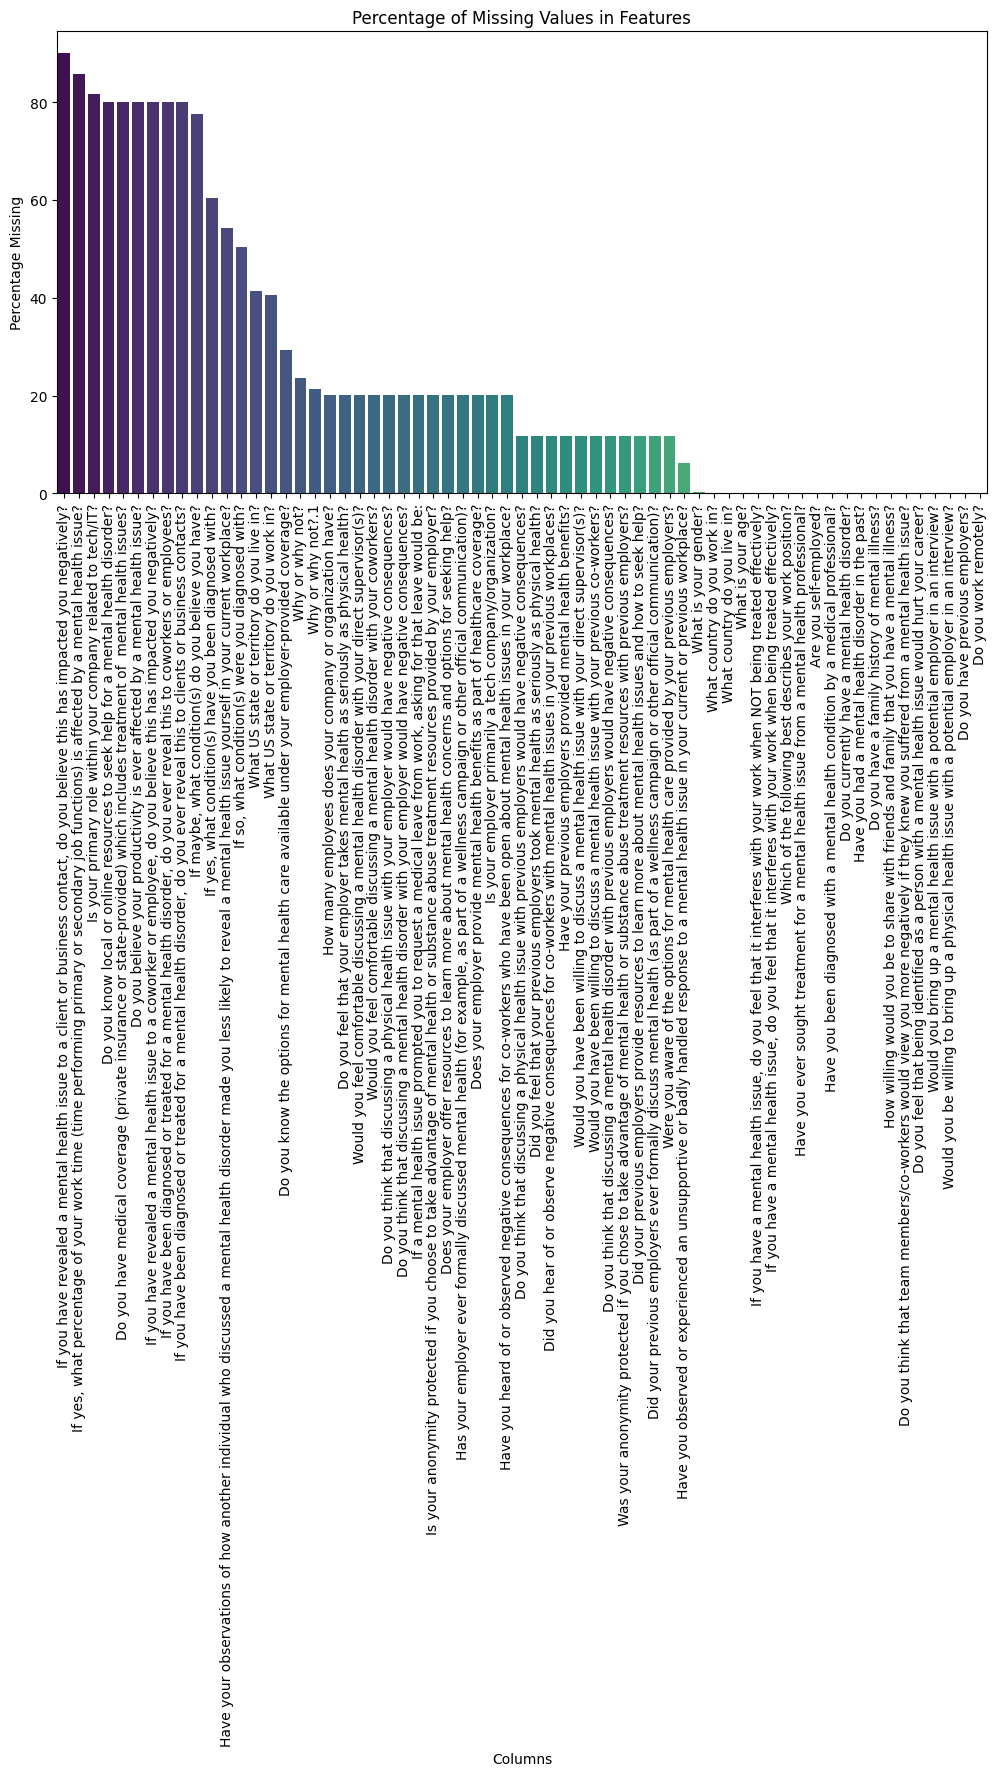

In [6]:
nan_col = (missing_values / total_rows) * 100

# Sort the columns by the percentage of missing values in descending order
nan_col = nan_col.sort_values(ascending=False)

# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_col.index, y=nan_col, palette='viridis')
plt.title('Percentage of Missing Values in Features')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Before cleaning the data and pre-preprocessing it. I noticed the the names of the the features are very long.
# I am going to rename them to avoid mistyping the column names

df = data.copy()

# Define new column names for all columns
new_column_names = {
    'Are you self-employed?': 'Self_Employed',
    'How many employees does your company or organization have?': 'Company_Size',
    'Is your employer primarily a tech company/organization?': 'Tech_Company',
    'Is your primary role within your company related to tech/IT?': 'Tech_Role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MH_Benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'MH_Coverage_Options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'Formal_MH_Discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'MH_Resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'Anonymity_Protection',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'Mental_Health_Medical_Leave',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'Discussing_MH_Neg_Consequences',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'Discussing_PH_Neg_Consequences',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'Comfort_Discussing_MH_Coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'Comfort_Discussing_MH_Supervisors',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'Employer_Takes_MH_Seriously_as_PH',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'Observed_Neg_Consequences_Coworkers_MH',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?': 'Medical_Coverage_MH',
    'Do you know local or online resources to seek help for a mental health disorder?': 'Know_Resources_Seek_Help_MH',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'Reveal_MH_Clients',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'Impact_Revealing_MH_Clients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'Reveal_MH_Coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'Impact_Revealing_MH_Coworkers',
    'Do you believe your productivity is ever affected by a mental health issue?': 'Productivity_Affected_MH',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'Percentage_Work_Time_Affected_MH',
    'Do you have previous employers?': 'Previous_Employers',
    'Have your previous employers provided mental health benefits?': 'Previous_Employers_MH_Benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'Previous_Employers_MH_Care_Options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'Previous_Employers_Formal_MH_Discussion',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'Previous_Employers_Mental_Health_Resources',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'Previous_Employers_Anonymity_Protection',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'Discussing_MH_Previous_Neg_Consequences',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'Discussing_PH_Previous_Neg_Consequences',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'Discuss_MH_Previous_Coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'Discuss_MH_Previous_Supervisors',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'Previous_Employers_Take_MH_Seriously',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'Observed_Neg_Consequences_Previous_Coworkers_MH',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'Willing_Bring_Up_PH_Interview',
    'Why or why not?': 'Reasons_Bring_Up_PH',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'Willing_Bring_Up_MH_Interview',
    'Why or why not?.1': 'Reasons_Bring_Up_MH',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'MH_Identifier_Neg_Career_Impact',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'Team_View_Negatively_Know_MH_Issue',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Willing_Share_MH_Friends_Family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'Observed_Unsupportive_Response_MH_Workplace',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Affect_Likelihood_Reveal_MH_Workplace',
    'Do you have a family history of mental illness?': 'Family_History_MH',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    'Do you currently have a mental health disorder?': 'Current_MH_Disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'Diagnosed_Conditions',
    'If maybe, what condition(s) do you believe you have?': 'Suspected_Conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'Diagnosed_By_Medical_Professional_with_MH',
    'If so, what condition(s) were you diagnosed with?': 'Diagnosed_Conditions_Professional',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'Sought_Treatment_MH_Professional',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'MH_Interference_With_Work_Treated_Effectively',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'MH_Interference_With_Work_Not_Treated_Effectively',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you live in?': 'Country_Live',
    'What US state or territory do you live in?': 'US_State_Live',
    'What country do you work in?': 'Country_Work',
    'What US state or territory do you work in?': 'US_State_Work',
    'Which of the following best describes your work position?': 'Work_Position',
    'Do you work remotely?': 'Work_Remotely'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

df.columns

Index(['Self_Employed', 'Company_Size', 'Tech_Company', 'Tech_Role',
       'MH_Benefits', 'MH_Coverage_Options', 'Formal_MH_Discussion',
       'MH_Resources', 'Anonymity_Protection', 'Mental_Health_Medical_Leave',
       'Discussing_MH_Neg_Consequences', 'Discussing_PH_Neg_Consequences',
       'Comfort_Discussing_MH_Coworkers', 'Comfort_Discussing_MH_Supervisors',
       'Employer_Takes_MH_Seriously_as_PH',
       'Observed_Neg_Consequences_Coworkers_MH',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Know_Resources_Seek_Help_MH', 'Reveal_MH_Clients',
       'Impact_Revealing_MH_Clients', 'Reveal_MH_Coworkers',
       'Impact_Revealing_MH_Coworkers', 'Productivity_Affected_MH',
       'Percentage_Work_Time_Affected_MH', 'Previous_Employers',
       'Previous_Employers_MH_Benefits', 'Previous_Employers_MH_Care_Options',
       'Previous_Employers_Formal_MH_Discussion',
       'Previous_Employers_

# **3. Data Preparation**
### Key tasks:
* Handling Missing Values 
* Data Transformation.
* Correcting wrong data format.

## Handling missing values

In [8]:
threshold = 0.4

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df))

# Get the list of columns with missing values exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage >= threshold].index.tolist()

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

categorical_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['float64','int64']).columns

num_imputer = SimpleImputer(strategy = 'mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_col] = categorical_imputer.fit_transform(df[categorical_col])
df[num_col] = num_imputer.fit_transform(df[num_col])

In [9]:
unique_values = {}  # Create a dictionary to store unique values

for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(f'Unique Values: {values}')
    print('-------------------------------------')


Column: Self_Employed
Unique Values: [0. 1.]
-------------------------------------
Column: Company_Size
Unique Values: ['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']
-------------------------------------
Column: Tech_Company
Unique Values: [1.         0.77050611 0.        ]
-------------------------------------
Column: MH_Benefits
Unique Values: ['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
-------------------------------------
Column: MH_Coverage_Options
Unique Values: ['No' 'Yes' 'I am not sure']
-------------------------------------
Column: Formal_MH_Discussion
Unique Values: ['No' 'Yes' "I don't know"]
-------------------------------------
Column: MH_Resources
Unique Values: ['No' 'Yes' "I don't know"]
-------------------------------------
Column: Anonymity_Protection
Unique Values: ["I don't know" 'Yes' 'No']
-------------------------------------
Column: Mental_Health_Medical_Leave
Unique Values: ['Very easy' 'Somewhat easy' 'Neither easy nor difficu

## Handling Incorrect data values

In [10]:
def clean(df, column_name):

    def calculate_average(value):
        if isinstance(value, str) and '-' in value:
            min_value, max_value = map(int, value.split('-'))
            return (min_value + max_value) / 2
        else:
            return value
    
    df[column_name] = df[column_name].apply(calculate_average)

    return df

df = clean(df,'Company_Size')

# Replace "More than 1000" with a suitable upper limit: 1400
df['Company_Size'] = df['Company_Size'].replace("More than 1000", 1400)

In [11]:
# Define the tolerance level for comparing values
tolerance = 1e-6  # Adjust the tolerance level as needed

# Replace values in the 'Tech_Company' column with 1 using tolerance
df['Tech_Company'] = np.where(np.isclose(df['Tech_Company'], 0.770506108202443, atol=tolerance) | np.isclose(df['Tech_Company'], 0.770506, atol=tolerance), 1, df['Tech_Company'])

In [12]:
# Define the gender mapping dictionary
gender_mapping = {
    'Male': 'Male',
    'male': 'Male',
    'Male ': 'Male',
    'Female': 'Female',
    'M': 'Male',
    'female': 'Female',
    'm': 'Male',
    "I identify as female.": 'Female',
    'female ': 'Female',
    'Bigender': 'Bigender',
    'non-binary': 'Non-binary',
    'Female assigned at birth ': 'Female',
    'F': 'Female',
    'Woman': 'Female',
    'man': 'Male',
    'fm': 'Female',
    'f': 'Female',
    'Cis female ': 'Female',
    'Transitioned, M2F': 'Transgender Female',
    'Genderfluid (born female)': 'Genderfluid',
    'Other/Transfeminine': 'Other',
    'Female or Multi-Gender Femme': 'Female',
    'Female ': 'Female',
    'woman': 'Female',
    'female/woman': 'Female',
    'Cis male': 'Male',
    'Male.': 'Male',
    'Androgynous': 'Other',
    'male 9:1 female, roughly': 'Male',
    'Male (cis)': 'Male',
    'Other': 'Other',
    'nb masculine': 'Male',
    'Cisgender Female': 'Female',
    'Man': 'Male',
    'Sex is male': 'Male',
    'none of your business': 'Male',
    'genderqueer': 'Genderqueer',
    'cis male': 'Male',
    'Human': 'Male',
    'Genderfluid': 'Genderfluid',
    'Enby': 'Non-binary',
    'Malr': 'Male',
    'genderqueer woman': 'Genderqueer',
    'mtf': 'Transgender',
    'Queer': 'Other',
    'Agender': 'Agender',
    'Dude': 'Male',
    'Fluid': 'Other',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ": 'Male',
    'mail': 'Male',
    'M|': 'Male',
    'Male/genderqueer': 'Other',
    'fem': 'Female',
    'Nonbinary': 'Non-binary',
    'male ': 'Male',
    'human': 'Male',
    'Female (props for making this a freeform field, though)': 'Female',
    ' Female': 'Female',
    'Unicorn': 'Male',
    'Cis Male': 'Male',
    'Male (trans, FtM)': 'Transgender Male',
    'Cis-woman': 'Female',
    'Genderqueer': 'Genderqueer',
    'cisdude': 'Male',
    'Genderflux demi-girl': 'Genderqueer',
    'female-bodied; no feelings about gender': 'Female',
    'cis man': 'Male',
    'AFAB': 'Female',
    'Transgender woman': 'Transgender Female',
    'MALE': 'Male'
}

# Replace values in the 'gender' column using the mapping
df['Gender'] = df['Gender'].map(gender_mapping)

most_frequent_gender = df['Gender'].mode()[0]
df['Gender'].fillna(most_frequent_gender, inplace=True)

In [13]:
# Calculate the mean age, excluding values less than 18 and greater than 75
mean_age = np.mean(df[(df['Age'] >= 18) & (df['Age'] <= 75)]['Age'])

# Replace values less than 18 and greater than 75 with the calculated mean age
df['Age'] = np.where((df['Age'] < 18) | (df['Age'] > 75), mean_age, df['Age'])
df['Age'] = df['Age'].round().astype(int)

In [14]:
df.columns

Index(['Self_Employed', 'Company_Size', 'Tech_Company', 'MH_Benefits',
       'MH_Coverage_Options', 'Formal_MH_Discussion', 'MH_Resources',
       'Anonymity_Protection', 'Mental_Health_Medical_Leave',
       'Discussing_MH_Neg_Consequences', 'Discussing_PH_Neg_Consequences',
       'Comfort_Discussing_MH_Coworkers', 'Comfort_Discussing_MH_Supervisors',
       'Employer_Takes_MH_Seriously_as_PH',
       'Observed_Neg_Consequences_Coworkers_MH', 'Previous_Employers',
       'Previous_Employers_MH_Benefits', 'Previous_Employers_MH_Care_Options',
       'Previous_Employers_Formal_MH_Discussion',
       'Previous_Employers_Mental_Health_Resources',
       'Previous_Employers_Anonymity_Protection',
       'Discussing_MH_Previous_Neg_Consequences',
       'Discussing_PH_Previous_Neg_Consequences',
       'Discuss_MH_Previous_Coworkers', 'Discuss_MH_Previous_Supervisors',
       'Previous_Employers_Take_MH_Seriously',
       'Observed_Neg_Consequences_Previous_Coworkers_MH',
       'Willing_

In [15]:
# Certain values are conceptually similar and can be grouped together. 
# For example "MH_Benefits" feature, I can consider combining "I don't know" with "No" 
# because they both represent a lack of awareness or access to mental health benefits

# Define a function to map values to ranges
def map_company_size(value):
    if value <= 100:
        return 'Small'
    elif 101 <= value <= 500:
        return 'Medium'
    else:
        return 'Large'

# Apply the mapping function to the 'Company_Size' column
df['Company_Size'] = df['Company_Size'].apply(map_company_size)

In [16]:
# List of values to replace with 'Uncertain'
values_to_replace = ["I am not sure", "I don't know", "Maybe", "Not eligible for coverage / N/A"]

# Replace the values in the entire dataframe
df.replace(values_to_replace, "Uncertain", inplace=True)

In [17]:
df['Mental_Health_Medical_Leave'] = df['Mental_Health_Medical_Leave'].replace({'Very easy': 'Easy',
    'Somewhat easy': 'Easy',
    'Neither easy nor difficult': 'Neutral',
    'Very difficult': 'Difficult',
    'Somewhat difficult': 'Difficult'})

In [18]:
df['Work_Position'].unique()

array(['Back-end Developer', 'Back-end Developer|Front-end Developer',
       'Supervisor/Team Lead',
       'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer',
       'Dev Evangelist/Advocate|Back-end Developer',
       'Support|Back-end Developer|One-person shop',
       'One-person shop|Front-end Developer|Back-end Developer',
       'Front-end Developer', 'Executive Leadership',
       'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Back-end Developer|Front-end Developer',
       'Designer', 'Other|Executive Leadership', 'One-person shop',
       'Other', 'Supervisor/Team Lead|Support|Back-end Developer',
       'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer',
       'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer',
       'Supervisor/

In [19]:
def categorize_department(role):
    if isinstance(role, str):
        if 'Dev' in role:
            return 'Development'
        elif 'Supervisor' in role or 'Executive' in role:
            return 'Management'
        elif 'Support' in role or 'SysAdmin' in role:
            return 'IT'
        elif 'Designer' in role:
            return 'Designer'
        else:
            return 'Other'
    return 'Other'

df['Work_Position'] = df['Work_Position'].apply(categorize_department)

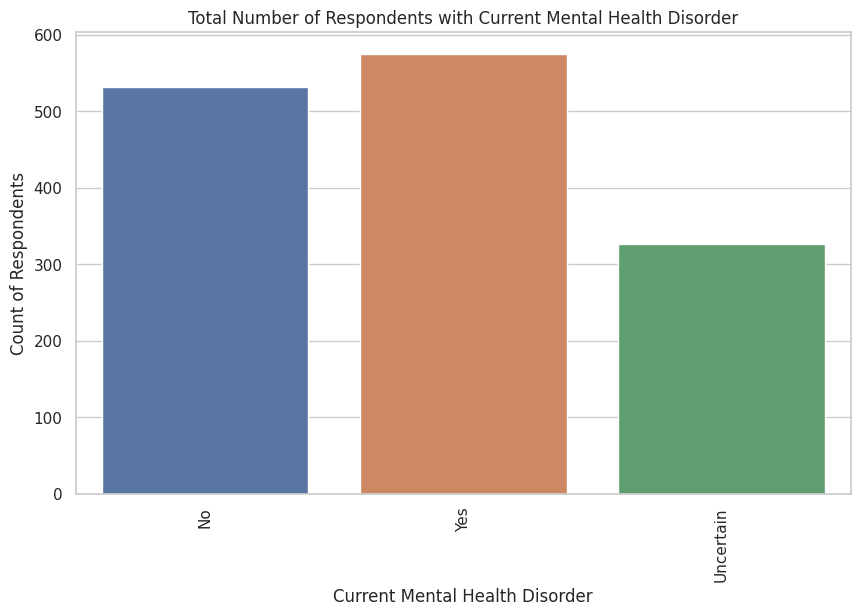

In [20]:
sns.set(style="whitegrid")  # Set the style for the plot

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Current_MH_Disorder")

# Add labels and a title
plt.xlabel("Current Mental Health Disorder")
plt.ylabel("Count of Respondents")
plt.title("Total Number of Respondents with Current Mental Health Disorder")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

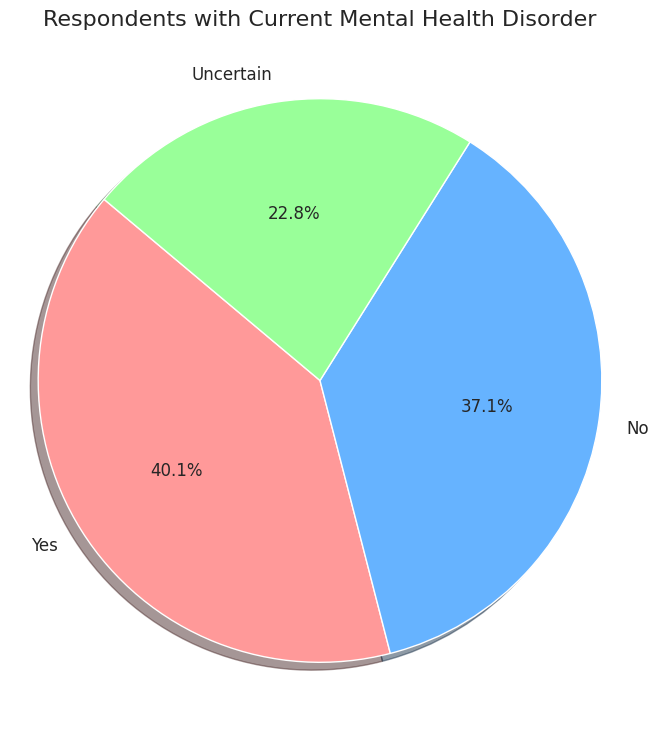

In [21]:
current_mh_disorder_counts = df['Current_MH_Disorder'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, ax = plt.subplots(figsize=(8, 9), facecolor='none')
ax.pie(current_mh_disorder_counts, labels=current_mh_disorder_counts.index, autopct='%1.1f%%', startangle=140,
       colors=colors, shadow=True, textprops={'fontsize': 12})
ax.set_title('Respondents with Current Mental Health Disorder', fontsize=16)
ax.axis('equal')

plt.show()

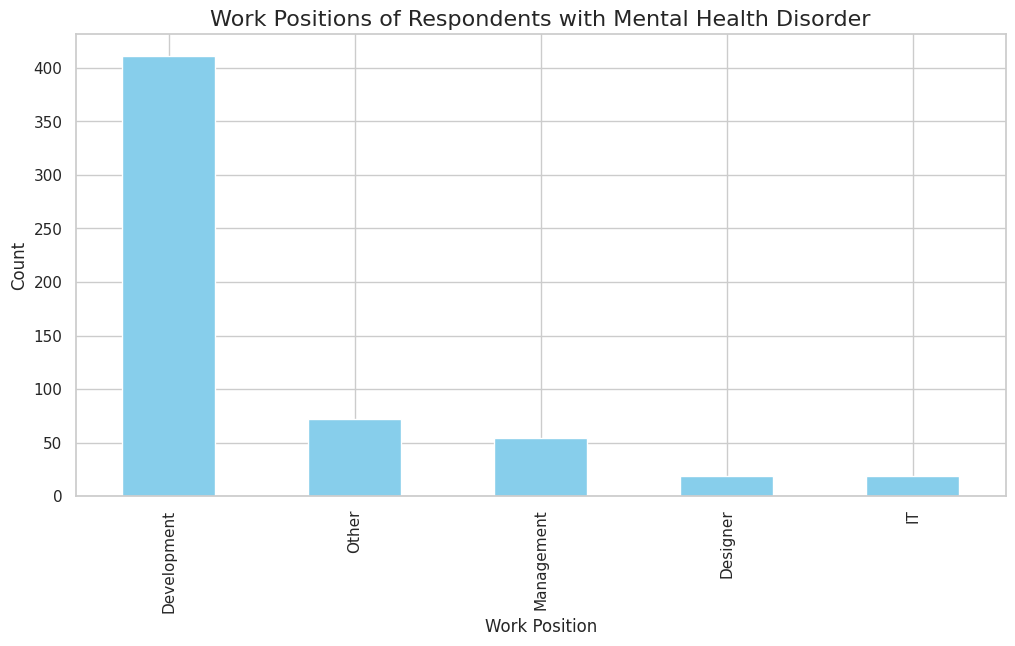

In [22]:
has_mh_disorder = df[df['Current_MH_Disorder'] == 'Yes']  # Filter for those with a mental health disorder (2 = Yes)
has_mh_disorder

work_position_counts = has_mh_disorder['Work_Position'].value_counts()
work_position_counts

plt.figure(figsize=(12, 6))
work_position_counts.plot(kind='bar', color='skyblue')
plt.title('Work Positions of Respondents with Mental Health Disorder', fontsize=16)
plt.xlabel('Work Position', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

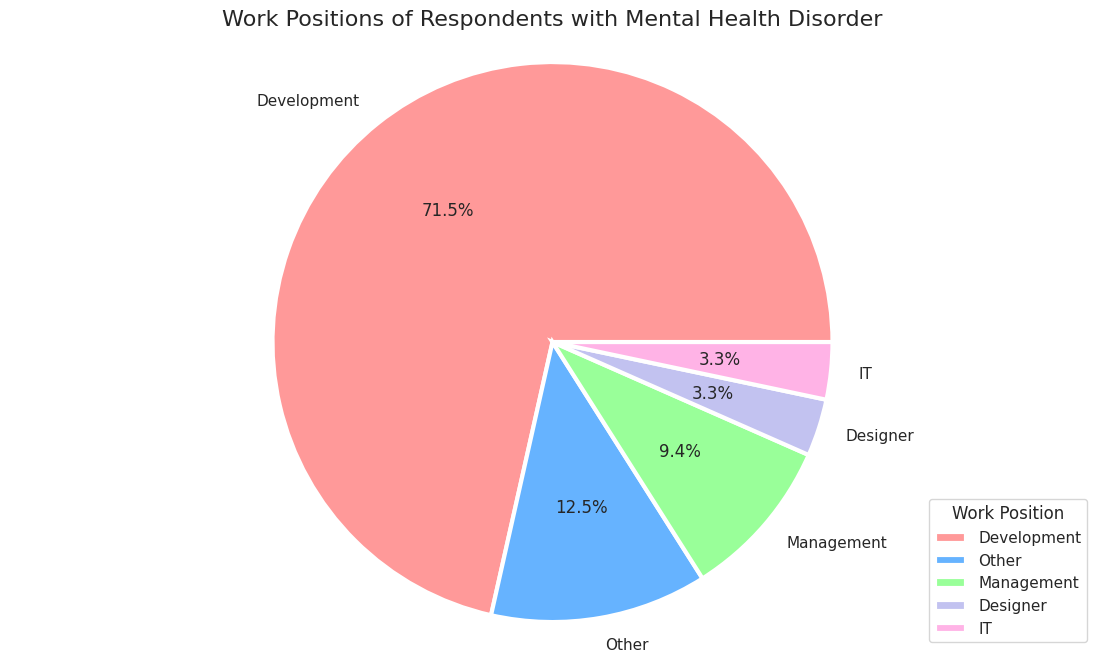

In [23]:

has_mh_disorder = df[df['Current_MH_Disorder'] == 'Yes']  # Filter for those with a mental health disorder (2 = Yes)
work_position_counts = has_mh_disorder['Work_Position'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6']
plt.figure(figsize=(14, 8))
plt.pie(work_position_counts, labels=work_position_counts.index, autopct='%1.1f%%', colors=colors,
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Work Positions of Respondents with Mental Health Disorder', fontsize=16)
plt.axis('equal')

# Add a legend
plt.legend(work_position_counts.index, title="Work Position", loc="lower right")
plt.show()


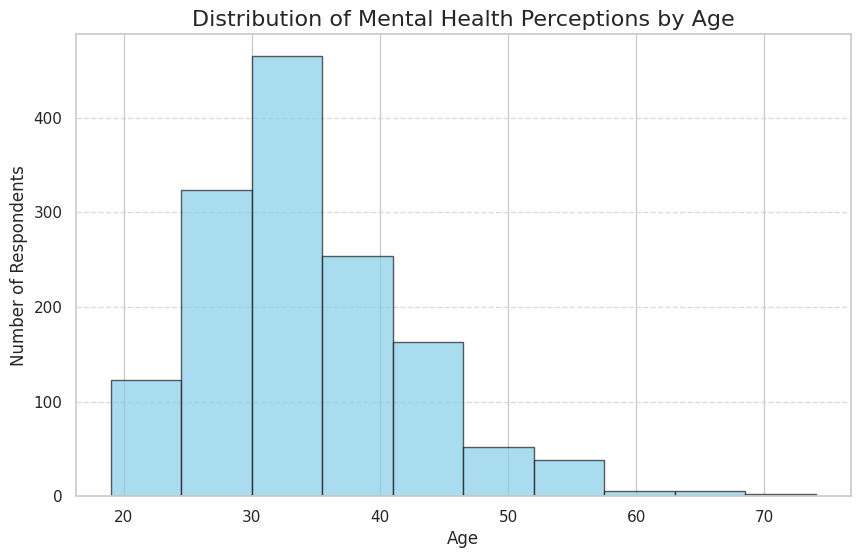

In [24]:
age_values = df['Age']

plt.figure(figsize=(10, 6))
plt.hist(age_values, bins=10, edgecolor='k', alpha=0.7, color='skyblue')
plt.title('Distribution of Mental Health Perceptions by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


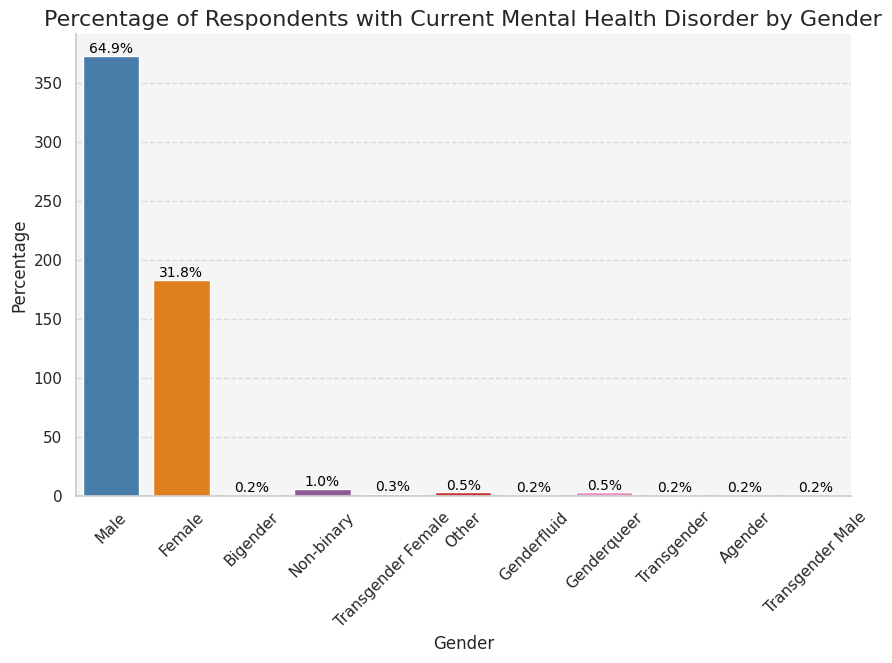

In [25]:
# Filter the DataFrame for respondents with 'Current_MH_disorder' equal to 'Yes'
yes_responses = df[df['Current_MH_Disorder'] == 'Yes']


custom_palette = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3', '#999999', '#e41a1c', '#dede00', '#f781bf']


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=yes_responses, palette=custom_palette)
plt.title('Percentage of Respondents with Current Mental Health Disorder by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Calculate and display percentages on top of the bars
total = len(yes_responses)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

# Set background color and remove top and right spines
ax.set_facecolor('#f5f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the grid lines
ax.yaxis.grid(linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_32/1712494230.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


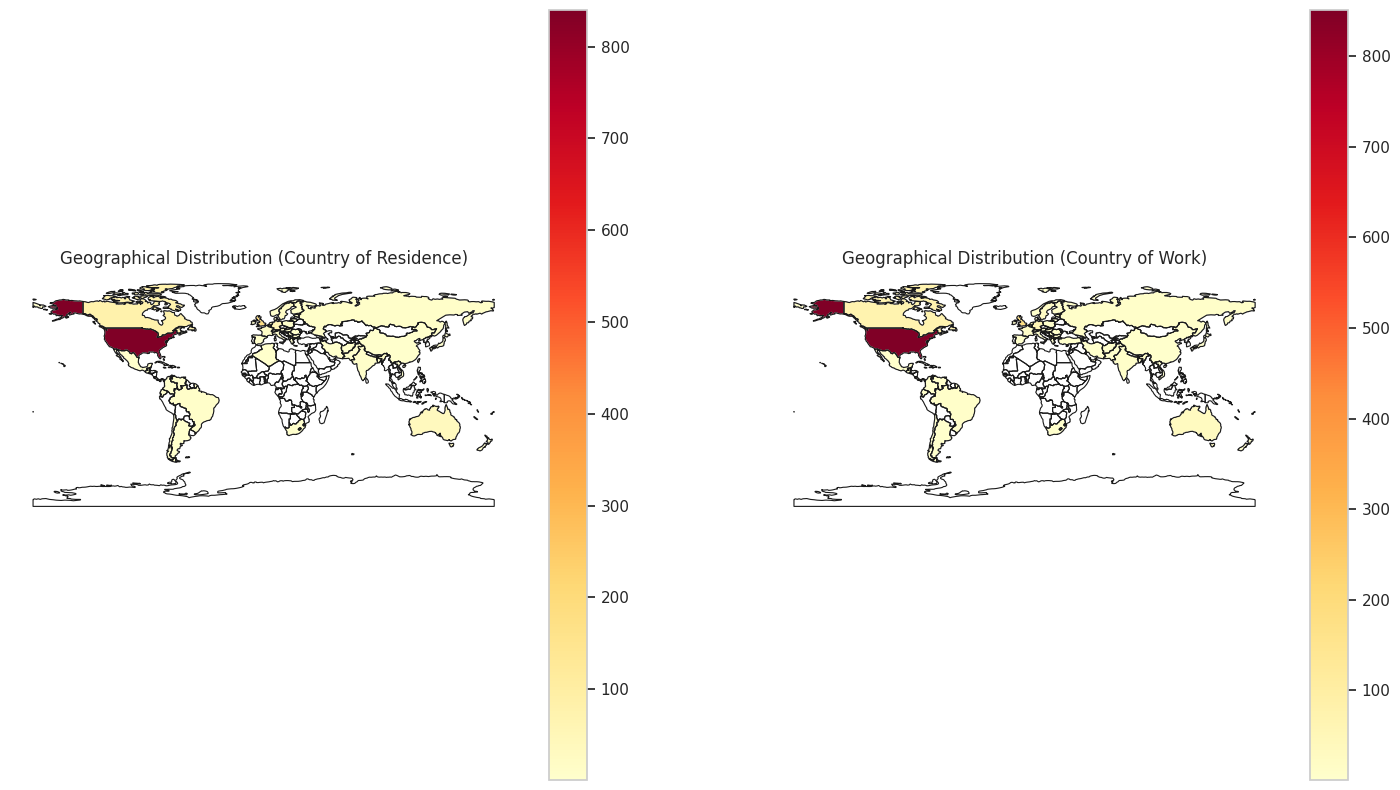

In [26]:
# Count the number of respondents in each country for 'Country_Live' and 'Country_Work'
country_live_counts = df['Country_Live'].value_counts()
country_work_counts = df['Country_Work'].value_counts()

# Create a GeoDataFrame with country boundaries (you may need to download a shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge country counts with the GeoDataFrame
world['Country_Live_Count'] = world['name'].map(country_live_counts)
world['Country_Work_Count'] = world['name'].map(country_work_counts)

# Plot the geographical distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Plot the distribution of 'Country_Live'
world.boundary.plot(ax=ax1, linewidth=0.8, color='k')
world.plot(column='Country_Live_Count', cmap='YlOrRd', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Geographical Distribution (Country of Residence)')
ax1.axis('off')

# Plot the distribution of 'Country_Work'
world.boundary.plot(ax=ax2, linewidth=0.8, color='k')
world.plot(column='Country_Work_Count', cmap='YlOrRd', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Geographical Distribution (Country of Work)')
ax2.axis('off')

plt.show()

# **4. Feature Engineering**
### Key tasks:
* Based on the survey questions and domain knowledge, perform feature engineering to create relevant features that capture key information.
* Encode categorical variables and text data into numerical representations.

In [27]:
# Get a list of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Get a list of categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Features:")
print(numerical_columns)

print("\nCategorical Features:")
print(categorical_columns)

Numerical Features:
['Self_Employed', 'Tech_Company', 'Previous_Employers', 'Sought_Treatment_MH_Professional', 'Age']

Categorical Features:
['Company_Size', 'MH_Benefits', 'MH_Coverage_Options', 'Formal_MH_Discussion', 'MH_Resources', 'Anonymity_Protection', 'Mental_Health_Medical_Leave', 'Discussing_MH_Neg_Consequences', 'Discussing_PH_Neg_Consequences', 'Comfort_Discussing_MH_Coworkers', 'Comfort_Discussing_MH_Supervisors', 'Employer_Takes_MH_Seriously_as_PH', 'Observed_Neg_Consequences_Coworkers_MH', 'Previous_Employers_MH_Benefits', 'Previous_Employers_MH_Care_Options', 'Previous_Employers_Formal_MH_Discussion', 'Previous_Employers_Mental_Health_Resources', 'Previous_Employers_Anonymity_Protection', 'Discussing_MH_Previous_Neg_Consequences', 'Discussing_PH_Previous_Neg_Consequences', 'Discuss_MH_Previous_Coworkers', 'Discuss_MH_Previous_Supervisors', 'Previous_Employers_Take_MH_Seriously', 'Observed_Neg_Consequences_Previous_Coworkers_MH', 'Willing_Bring_Up_PH_Interview', 'Reason

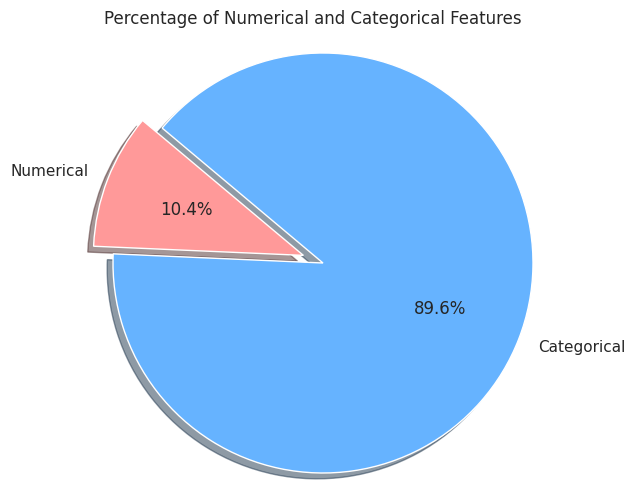

In [28]:
# Determine the data types of features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns

# Count the number of numerical and categorical features
num_numerical_features = len(numerical_features)
num_categorical_features = len(categorical_features)

# Create a pie chart to visualize the percentage of features
labels = ['Numerical', 'Categorical']
sizes = [num_numerical_features, num_categorical_features]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Numerical')

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Numerical and Categorical Features')
plt.axis('equal') 

# Display the pie chart
plt.show()

In [29]:
# To ensure that 'Age' and 'Company_Size' is on the same scale as other features in the dataset and to
# prevent it from dominating the modeling process due to its larger scale, I have
# applied Min-Max Scaling to the 'Age' feature. This scaling technique transforms
# the values of 'Age' to a consistent range between 0 and 1 while preserving the
# relative differences in ages.

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [30]:
label_encoder = LabelEncoder()
# Select categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [31]:
df.head(5)

Self_Employed  Company_Size  Tech_Company  MH_Benefits  \
0            0.0             2           1.0            1   
1            0.0             2           1.0            0   
2            0.0             2           1.0            0   
3            1.0             2           1.0            2   
4            0.0             2           0.0            2   

   MH_Coverage_Options  Formal_MH_Discussion  MH_Resources  \
0                    0                     0             0   
1                    2                     2             2   
2                    0                     0             0   
3                    0                     0             0   
4                    2                     0             0   

   Anonymity_Protection  Mental_Health_Medical_Leave  \
0                     1                            1   
1                     2                            1   
2                     1                            2   
3                     1                            1   
4                     0                            2   

   Discussing_MH_Neg_Consequences  ...  \
0                               0  ...   
1                               0  ...   
2                               1  ...   
3                               1  ...   
4                               2  ...   

   Diagnosed_By_Medical_Professional_with_MH  \
0                                          1   
1                                          1   
2                                          0   
3                                          1   
4                                          1   

   Sought_Treatment_MH_Professional  \
0                               0.0   
1                               1.0   
2                               1.0   
3                               1.0   
4                               1.0   

   MH_Interference_With_Work_Treated_Effectively  \
0                                              1   
1                                              3   
2                                              1   
3                                              4   
4                                              4   

   MH_Interference_With_Work_Not_Treated_Effectively       Age  Gender  \
0                                                  1  0.363636       5   
1                                                  4  0.181818       5   
2                                                  1  0.345455       5   
3                                                  4  0.436364       5   
4                                                  4  0.436364       2   

   Country_Live  Country_Work  Work_Position  Work_Remotely  
0            49            49              1              2  
1            50            50              1              1  
2            49            49              1              0  
3            49            49              3              2  
4            50            50              1              2  

[5 rows x 48 columns]

In [32]:
threshold = 0.25

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold)

selected_features = selector.fit_transform(df)

# Get the mask of selected features (True for selected, False for discarded)
feature_mask = selector.get_support()

# Create a new DataFrame with selected features
df = df.loc[:, feature_mask]

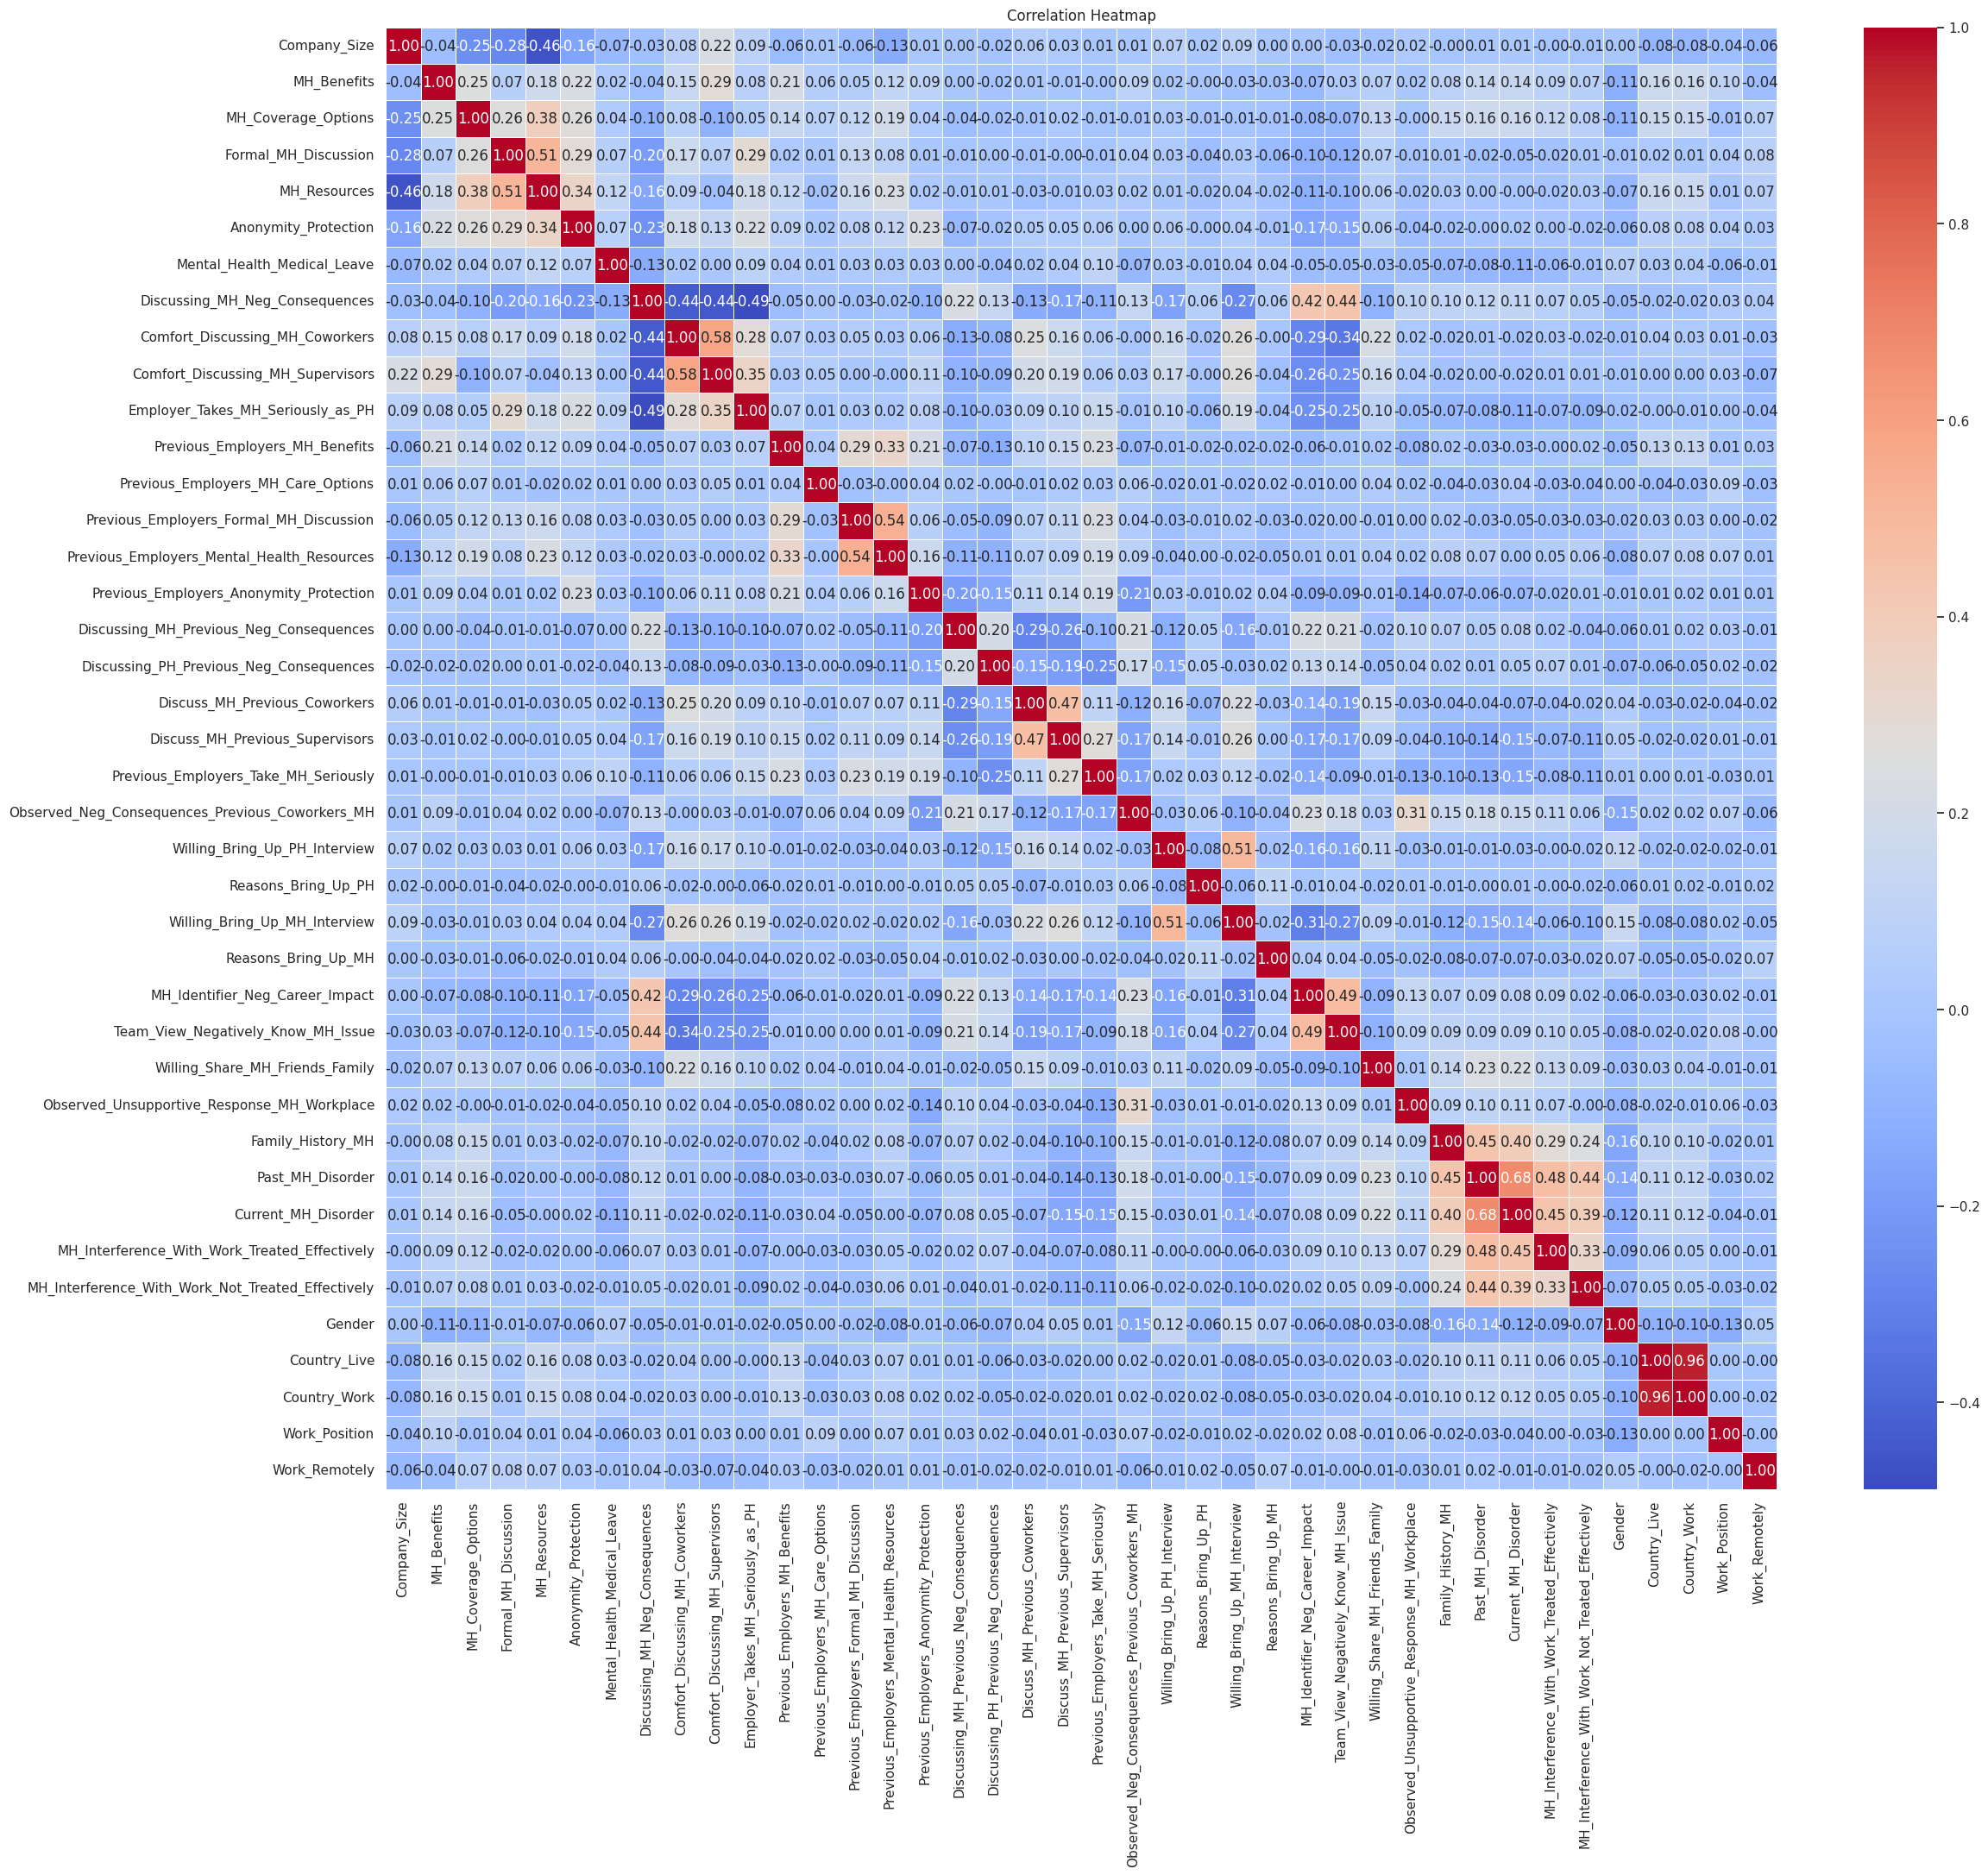

In [33]:
## Correlation Analysis

correlation_matrix = df.corr()

plt.figure(figsize=(26, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
correlation_matrix = df.corr()

# Create a mask for highly correlated features
# The mask will be True for correlated pairs, and we'll keep the first feature
correlation_mask = (correlation_matrix.abs() > 0.7) & (correlation_matrix != 1)

# Identify columns (features) to drop
columns_to_drop = set()
for feature in correlation_mask.columns:
    correlated_features = correlation_mask.index[correlation_mask[feature]]
    if len(correlated_features) > 0:
        columns_to_drop.add(feature)

# Remove highly correlated columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [35]:
df.head()

Company_Size  MH_Benefits  MH_Coverage_Options  Formal_MH_Discussion  \
0             2            1                    0                     0   
1             2            0                    2                     2   
2             2            0                    0                     0   
3             2            2                    0                     0   
4             2            2                    2                     0   

   MH_Resources  Anonymity_Protection  Mental_Health_Medical_Leave  \
0             0                     1                            1   
1             2                     2                            1   
2             0                     1                            2   
3             0                     1                            1   
4             0                     0                            2   

   Discussing_MH_Neg_Consequences  Comfort_Discussing_MH_Coworkers  \
0                               0                                1   
1                               0                                1   
2                               1                                1   
3                               1                                1   
4                               2                                1   

   Comfort_Discussing_MH_Supervisors  ...  Willing_Share_MH_Friends_Family  \
0                                  2  ...                                4   
1                                  2  ...                                4   
2                                  1  ...                                4   
3                                  2  ...                                0   
4                                  0  ...                                4   

   Observed_Unsupportive_Response_MH_Workplace  Family_History_MH  \
0                                            1                  0   
1                                            1                  2   
2                                            0                  0   
3                                            1                  0   
4                                            2                  2   

   Past_MH_Disorder  Current_MH_Disorder  \
0                 2                    0   
1                 2                    2   
2                 1                    0   
3                 2                    2   
4                 2                    2   

   MH_Interference_With_Work_Treated_Effectively  \
0                                              1   
1                                              3   
2                                              1   
3                                              4   
4                                              4   

   MH_Interference_With_Work_Not_Treated_Effectively  Gender  Work_Position  \
0                                                  1       5              1   
1                                                  4       5              1   
2                                                  1       5              1   
3                                                  4       5              3   
4                                                  4       2              1   

   Work_Remotely  
0              2  
1              1  
2              0  
3              2  
4              2  

[5 rows x 38 columns]

# **5: Dimensional Reduction and Clustering** 
### Key tasks:
* Perform dimensionality reduction using the Principal Component Analysis (PCA) technique to reduce the dimensionality of the dataset.
* Perfrom K-Means Clustering

Text(0, 0.5, 'Cumulative Explained Variance')

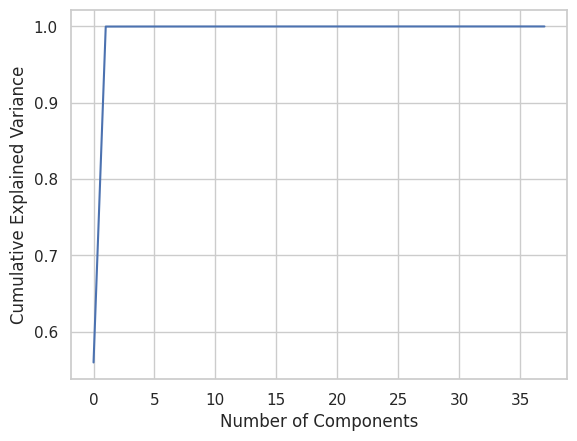

In [36]:
pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


Text(0, 0.5, 'Explained Variance')

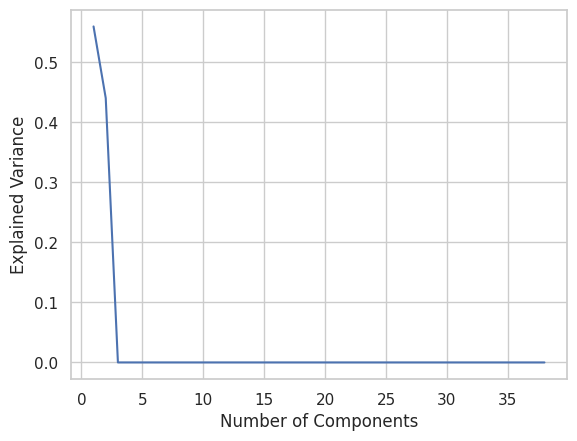

In [37]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [38]:
# Standardize the numerical features (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)

# Fit PCA to the scaled data
principal_components = pca.fit_transform(df)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [39]:
principal_df.head()

PC1         PC2
0 -109.287298 -347.329999
1  355.885805 -168.394647
2  502.366385   51.153460
3  761.283877  -55.085562
4 -121.446063 -469.008369

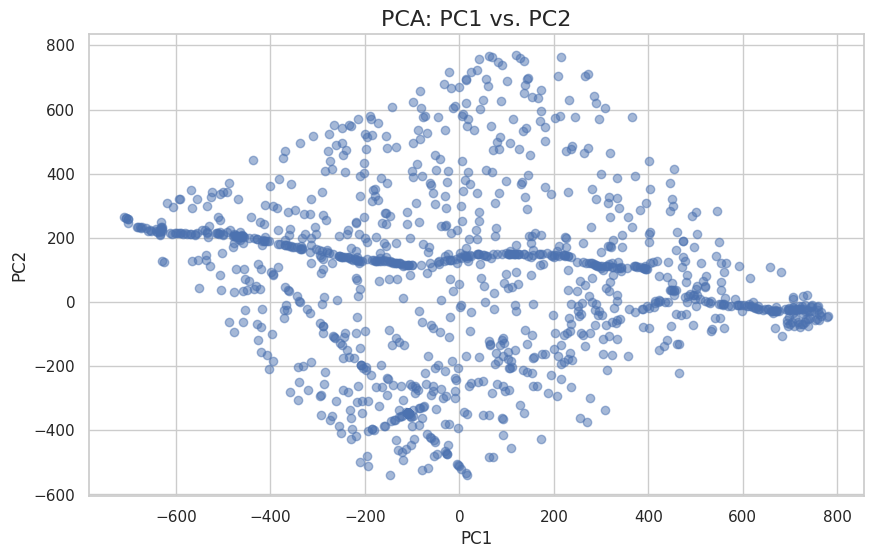

In [40]:
# Extract PC1 and PC2 values from principal_df
PC1 = principal_df['PC1']
PC2 = principal_df['PC2']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(PC1, PC2, alpha=0.5)  # alpha controls point transparency

plt.title('PCA: PC1 vs. PC2', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)

plt.grid(True)
plt.show()

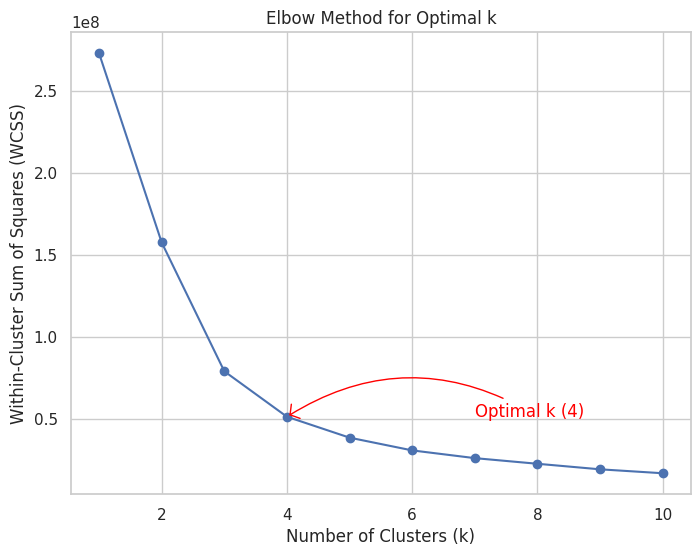

In [41]:
wcss = []  # Within-cluster sum of squares

# Iterate through a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center
    
# Rest of your code to plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Add an arrow pointing at the fourth cluster on the right-hand side
arrow_properties = dict(
    facecolor='red', edgecolor='red',
    arrowstyle='->, head_width=0.5', connectionstyle='arc3, rad=0.3'
)
plt.annotate('Optimal k (4)', xy=(4, wcss[3]), xytext=(7, wcss[3] + 10000),
             arrowprops=arrow_properties, fontsize=12, color='red')

plt.show()


In [42]:
k = 4

kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
kmeans.fit(df)

# Get cluster labels for each data point
clusters = kmeans.labels_

principal_df['Cluster'] = clusters

# **6. Results and Visualizations**
* Cluster Characteristics.
* Evaluate the quality of clusters using the silhouette score.
* Cluster Visualization.
* Key Findings

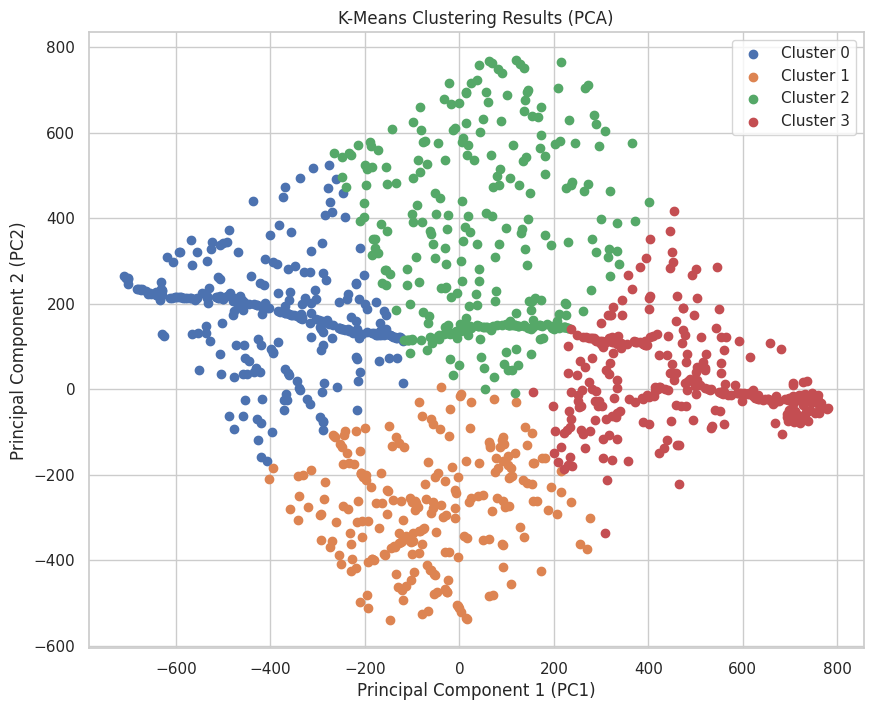

In [43]:

# Create a scatter plot of the PCA-transformed data with color-coded clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(data['PC1'], data['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(principal_df[['PC1', 'PC2', 'Cluster']], principal_df['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5450359402107277


In [45]:

# Analyze the clusters and their characteristics
df['Cluster'] = clusters
cluster_groups = df.groupby('Cluster')

for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    print(group.describe().T)
    print("\n")

Cluster 0:
                                                   count        mean  \
Company_Size                                       307.0    1.328990   
MH_Benefits                                        307.0    1.469055   
MH_Coverage_Options                                307.0    0.687296   
Formal_MH_Discussion                               307.0    0.465798   
MH_Resources                                       307.0    0.706840   
Anonymity_Protection                               307.0    1.179153   
Mental_Health_Medical_Leave                        307.0    1.091205   
Discussing_MH_Neg_Consequences                     307.0    0.781759   
Comfort_Discussing_MH_Coworkers                    307.0    0.921824   
Comfort_Discussing_MH_Supervisors                  307.0    1.250814   
Employer_Takes_MH_Seriously_as_PH                  307.0    1.107492   
Previous_Employers_MH_Benefits                     307.0    1.299674   
Previous_Employers_MH_Care_Options                 30

Cluster 0:


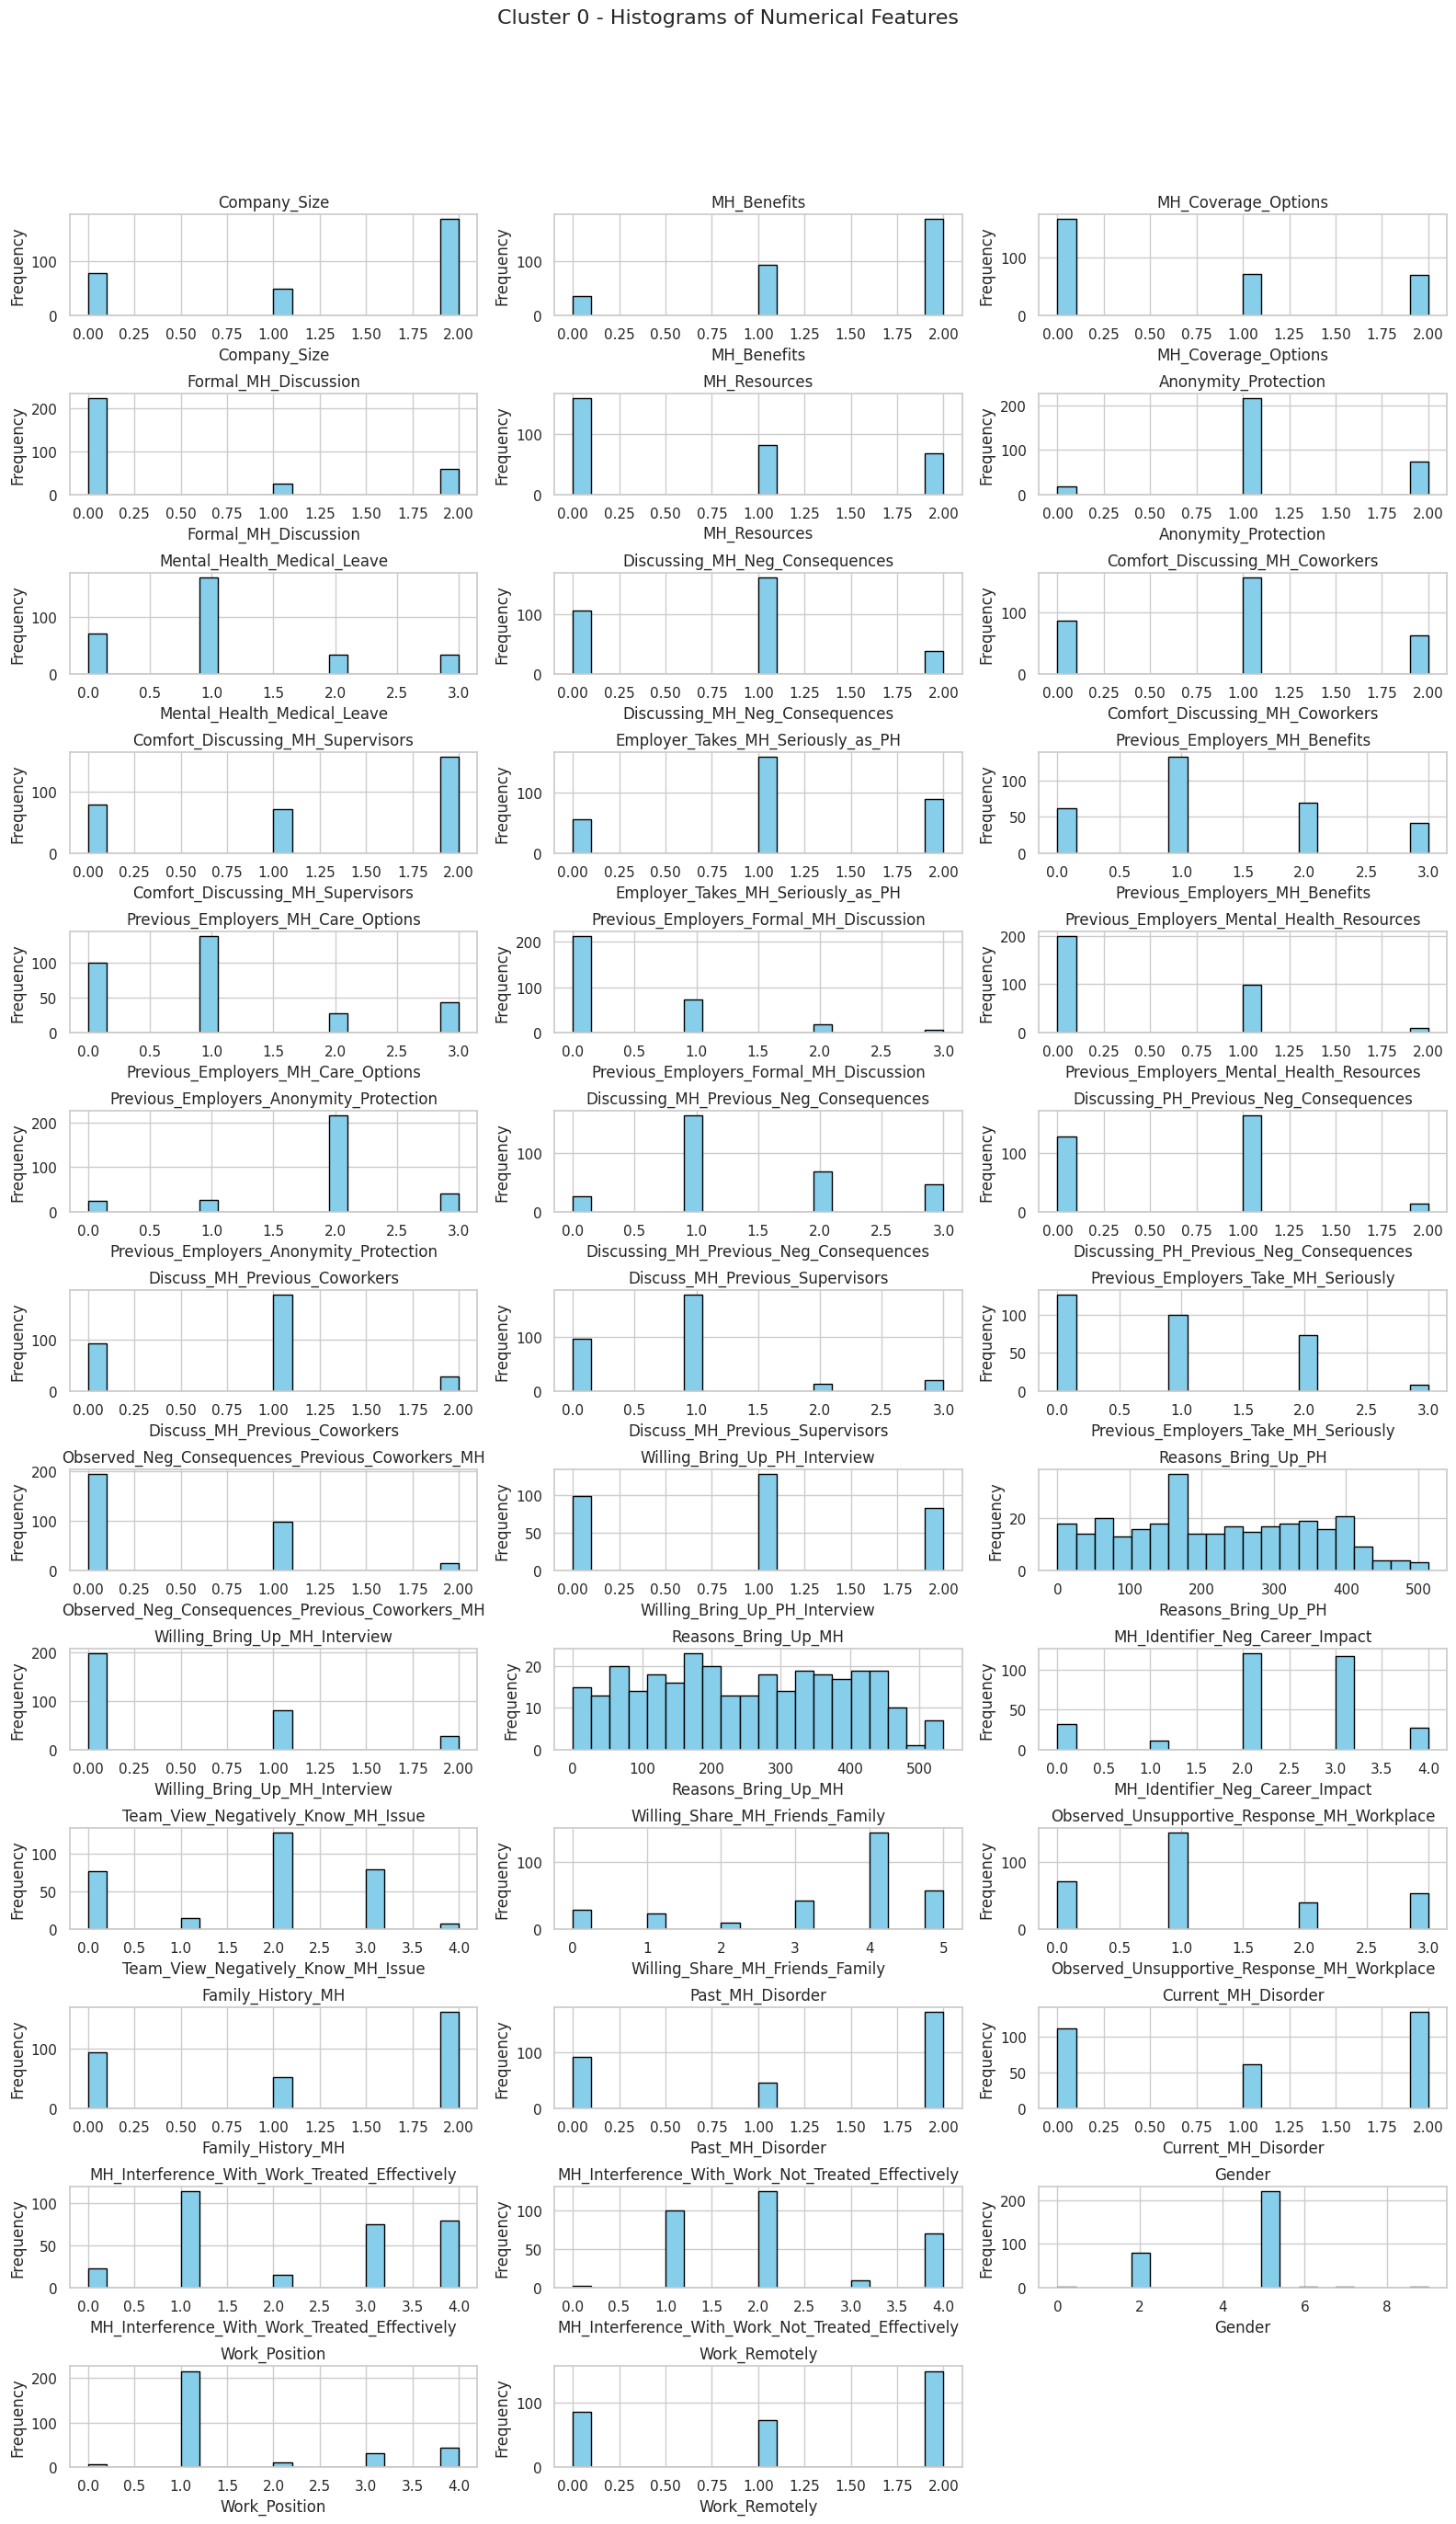

Cluster 1:


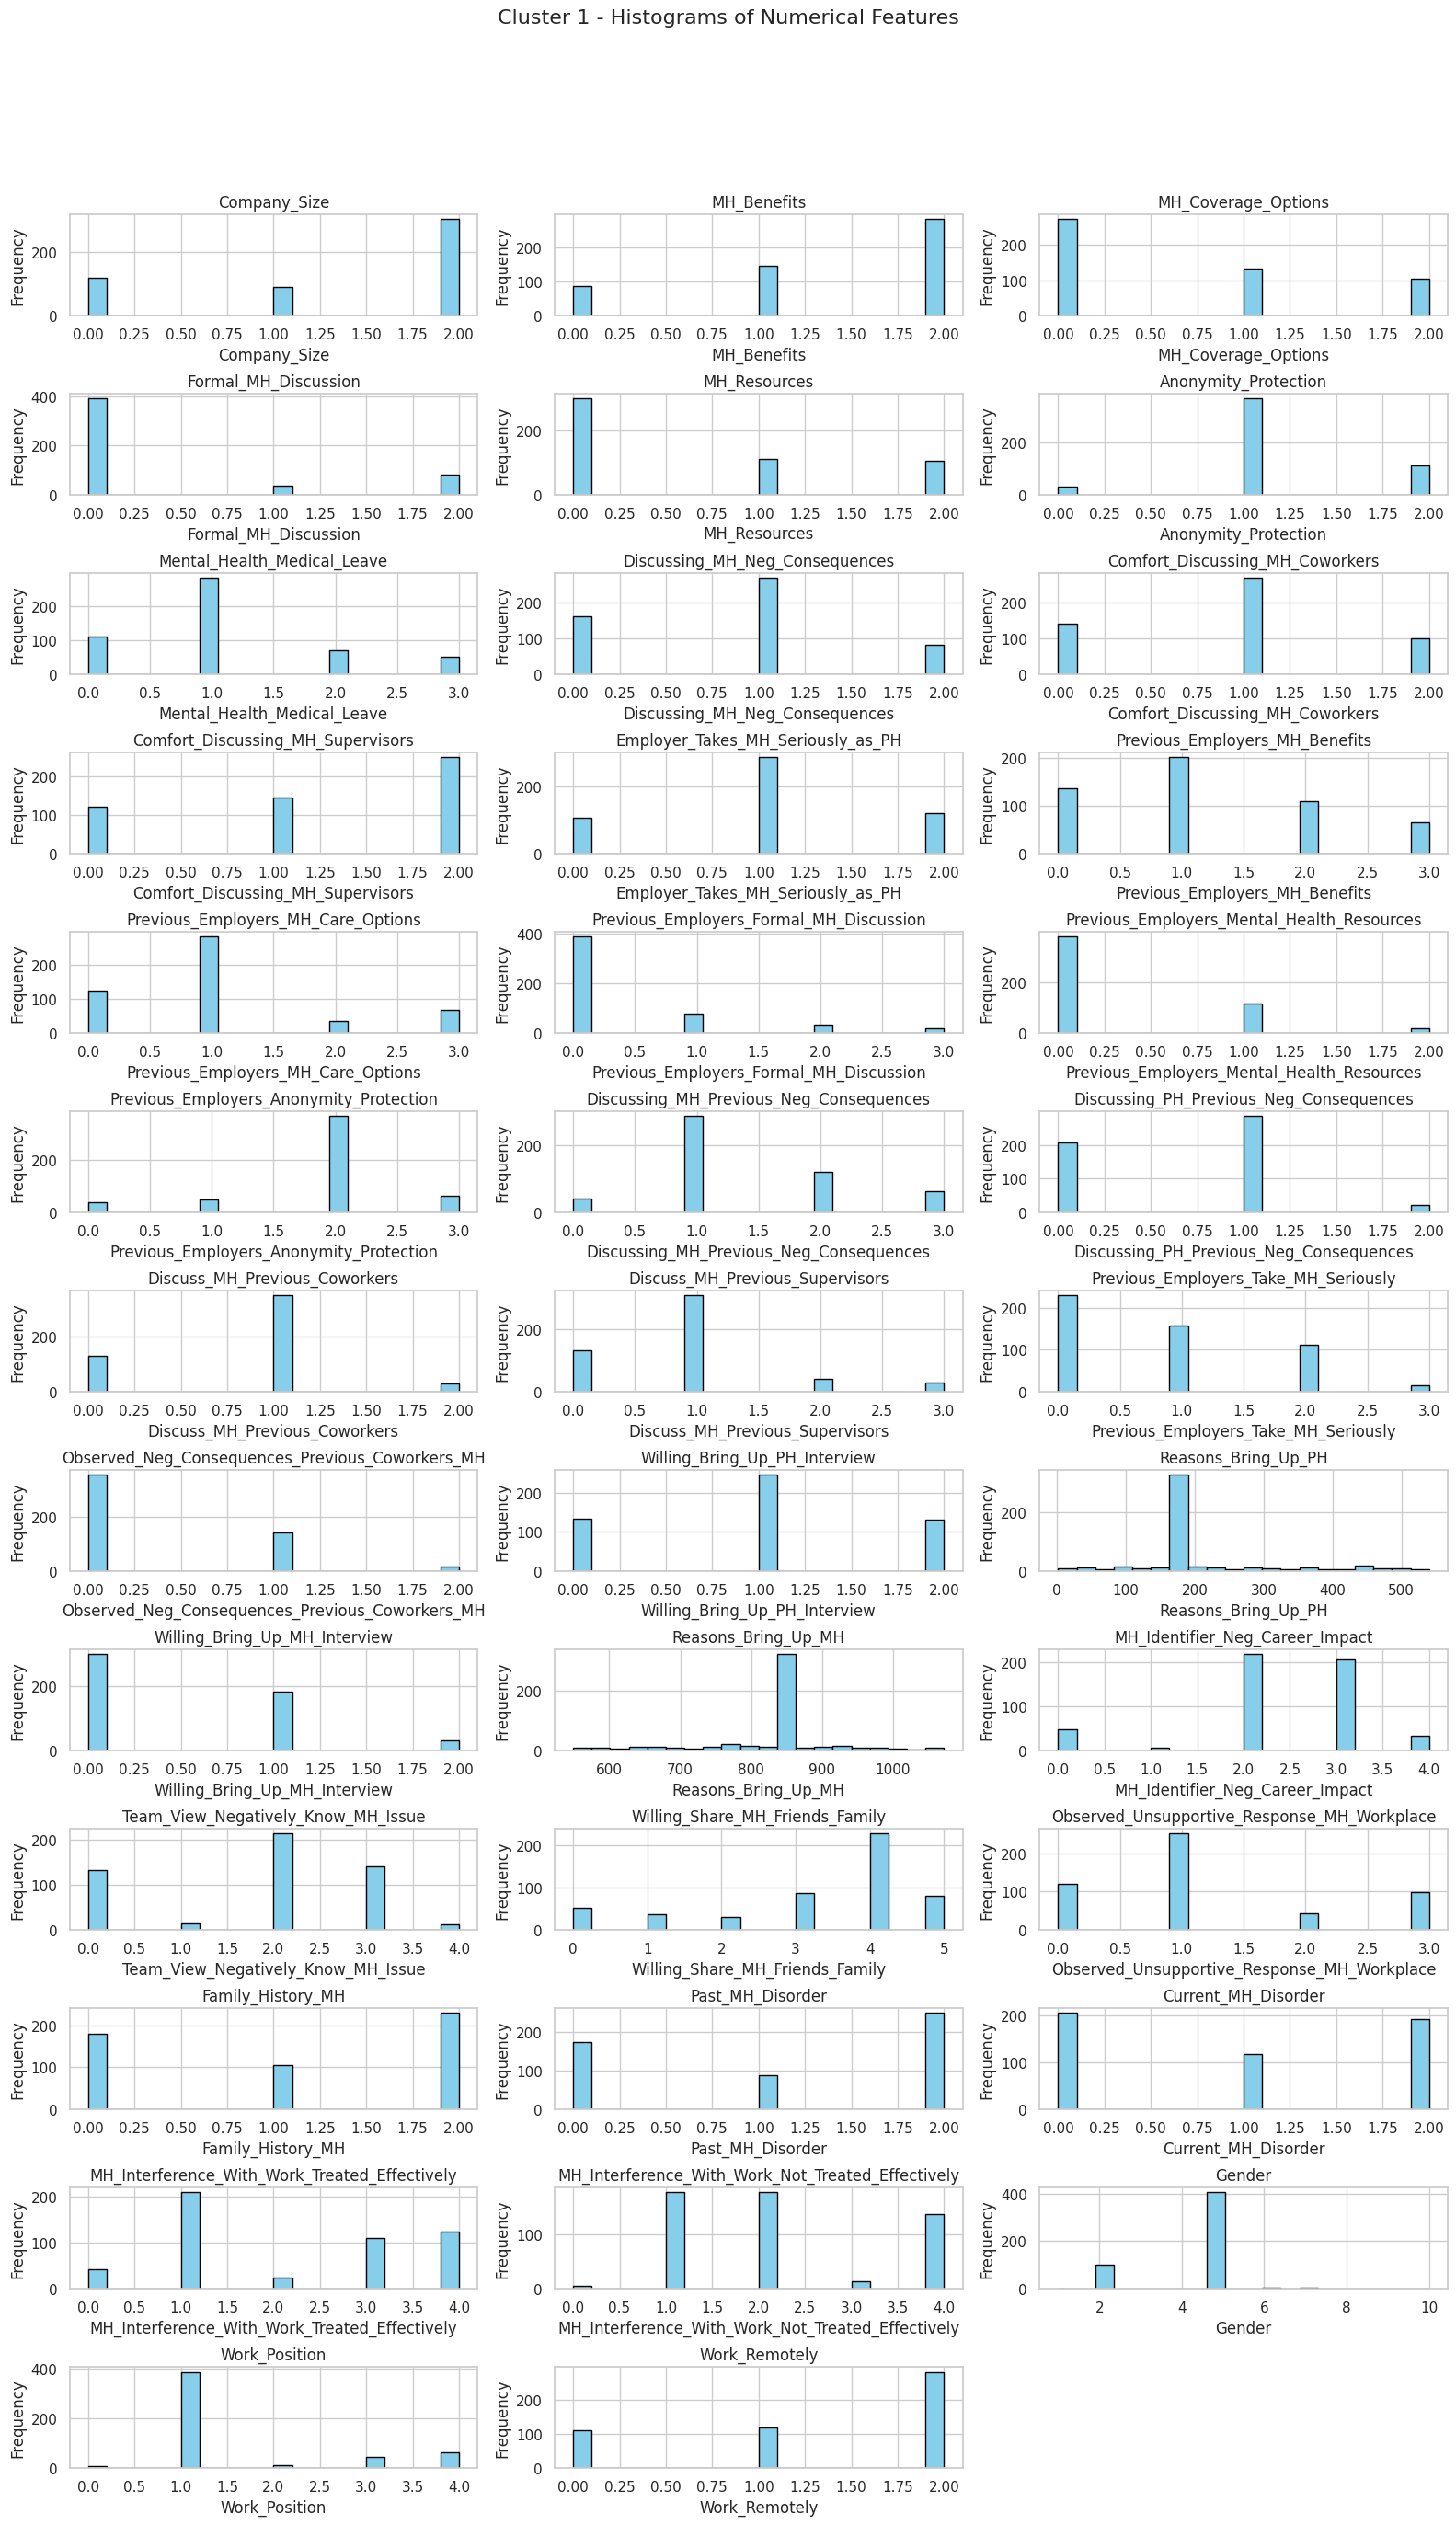

Cluster 2:


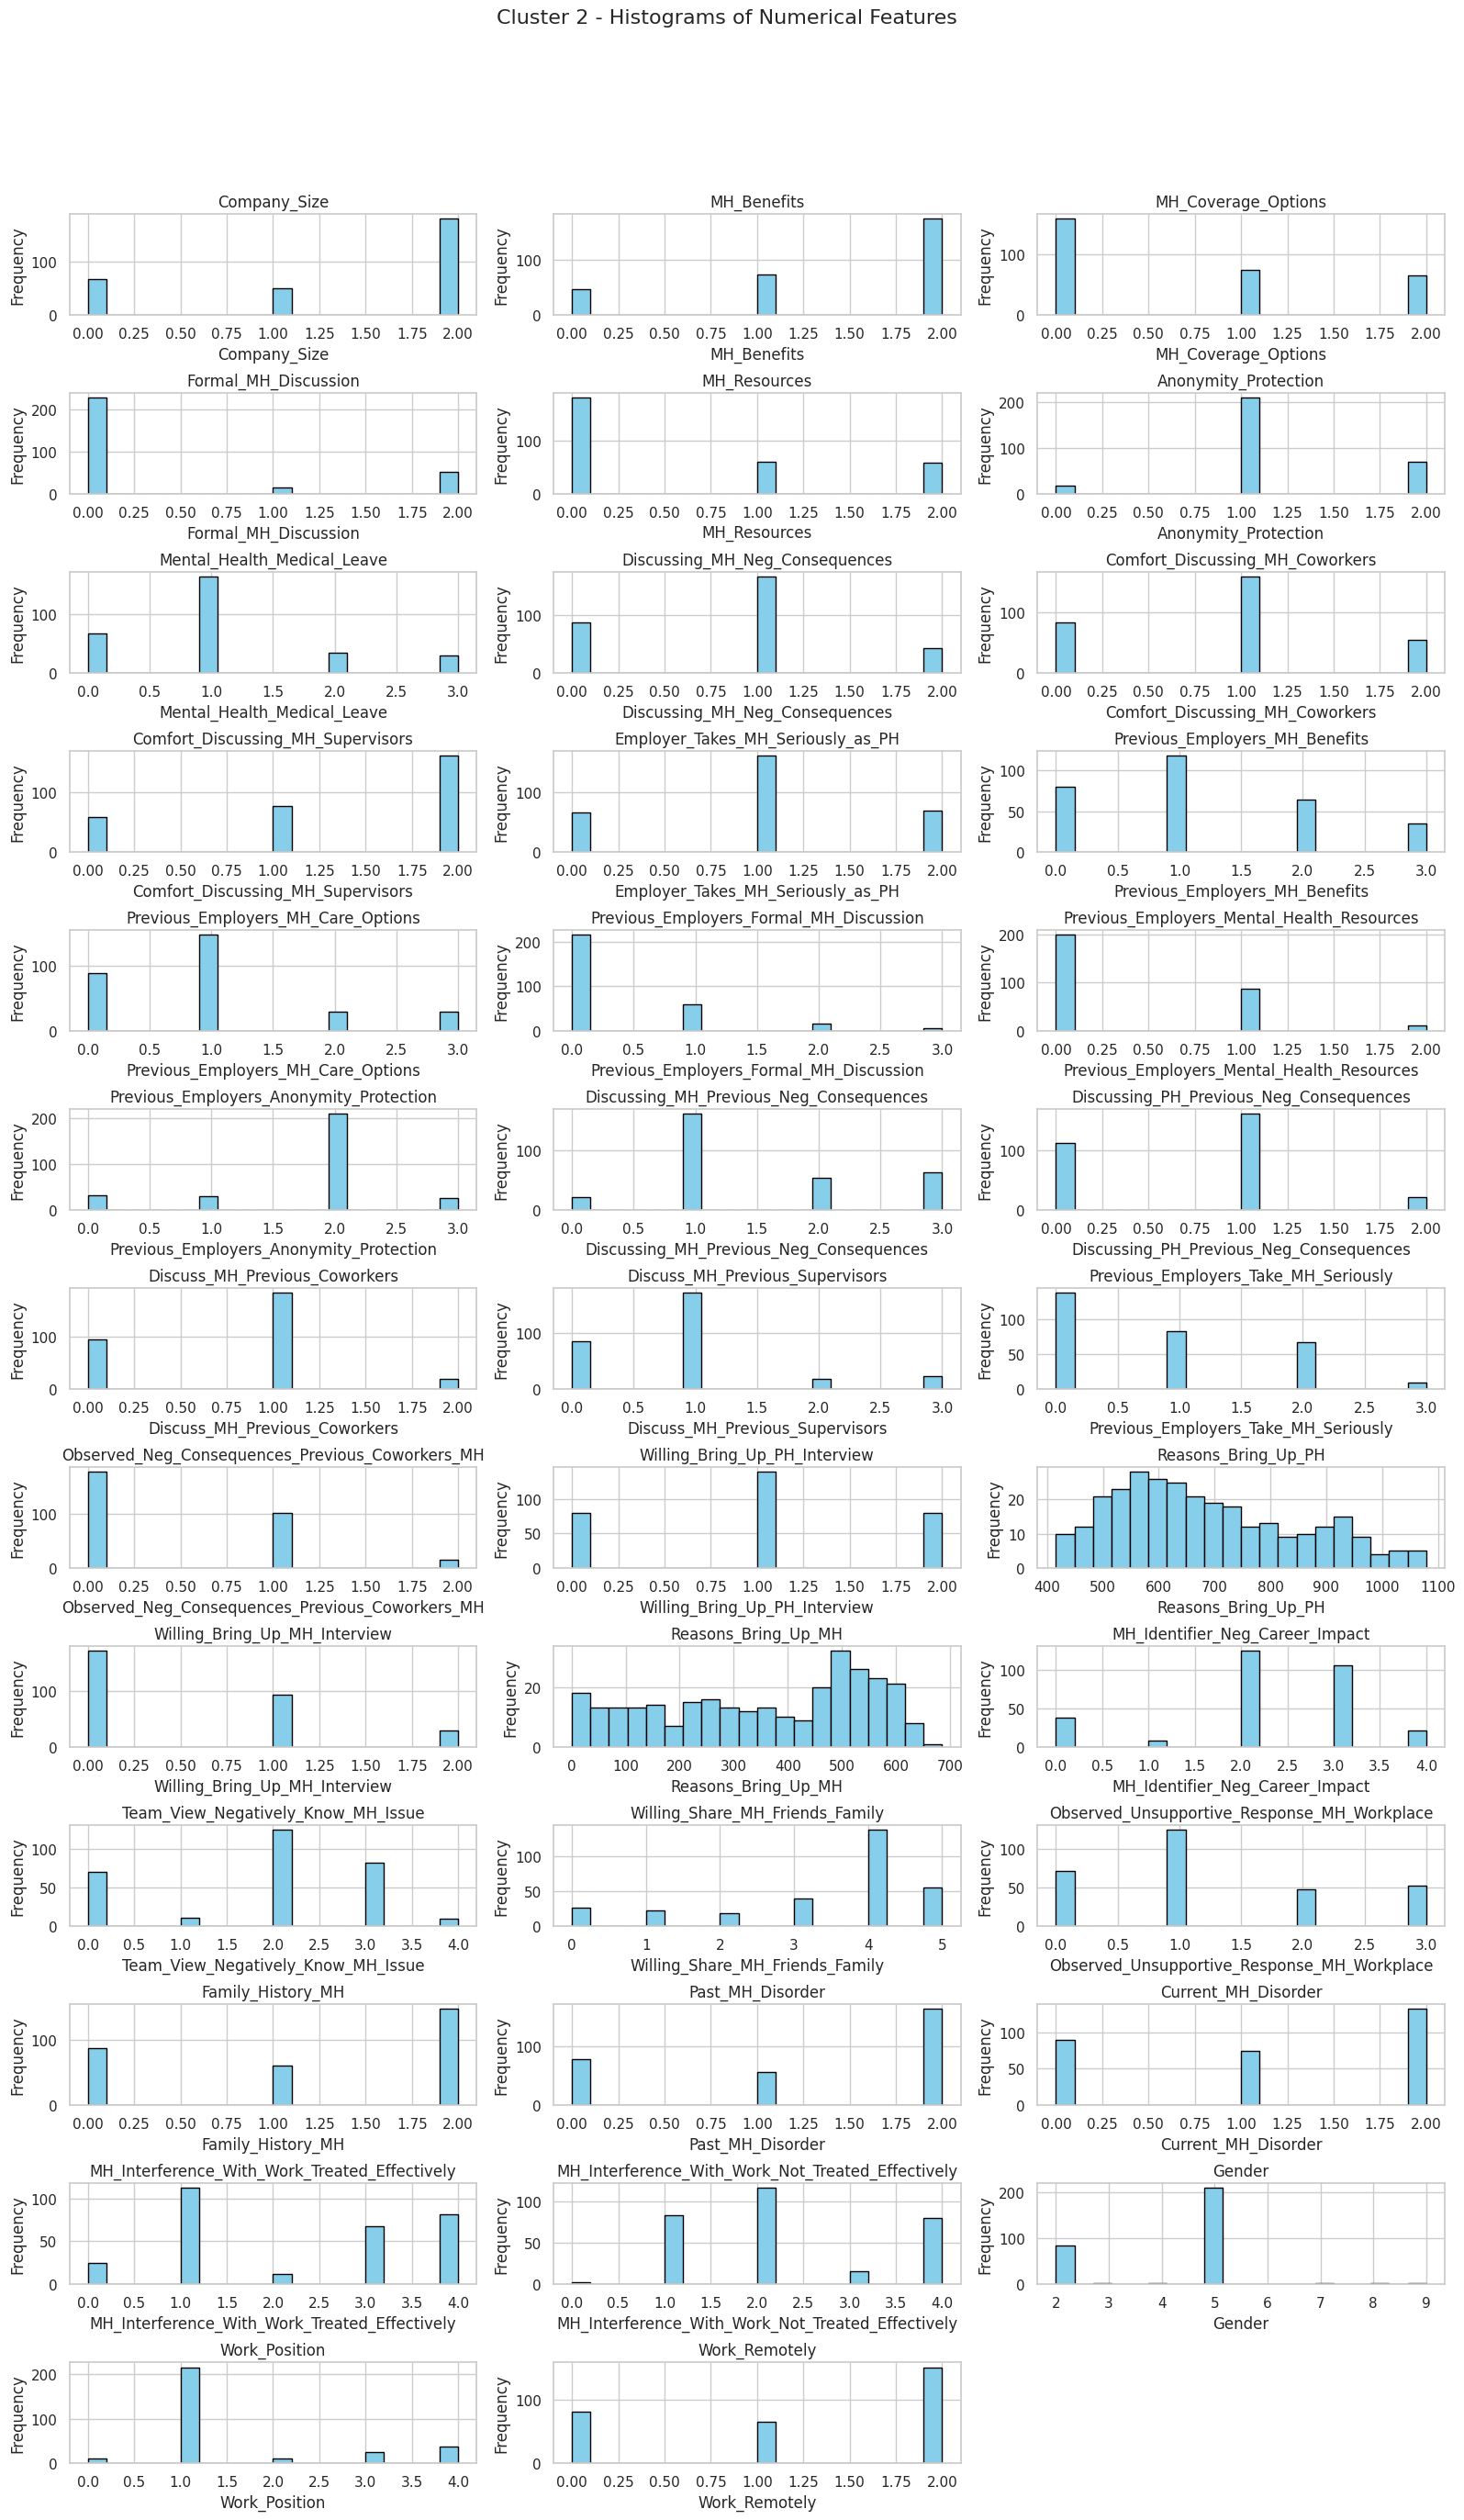

Cluster 3:


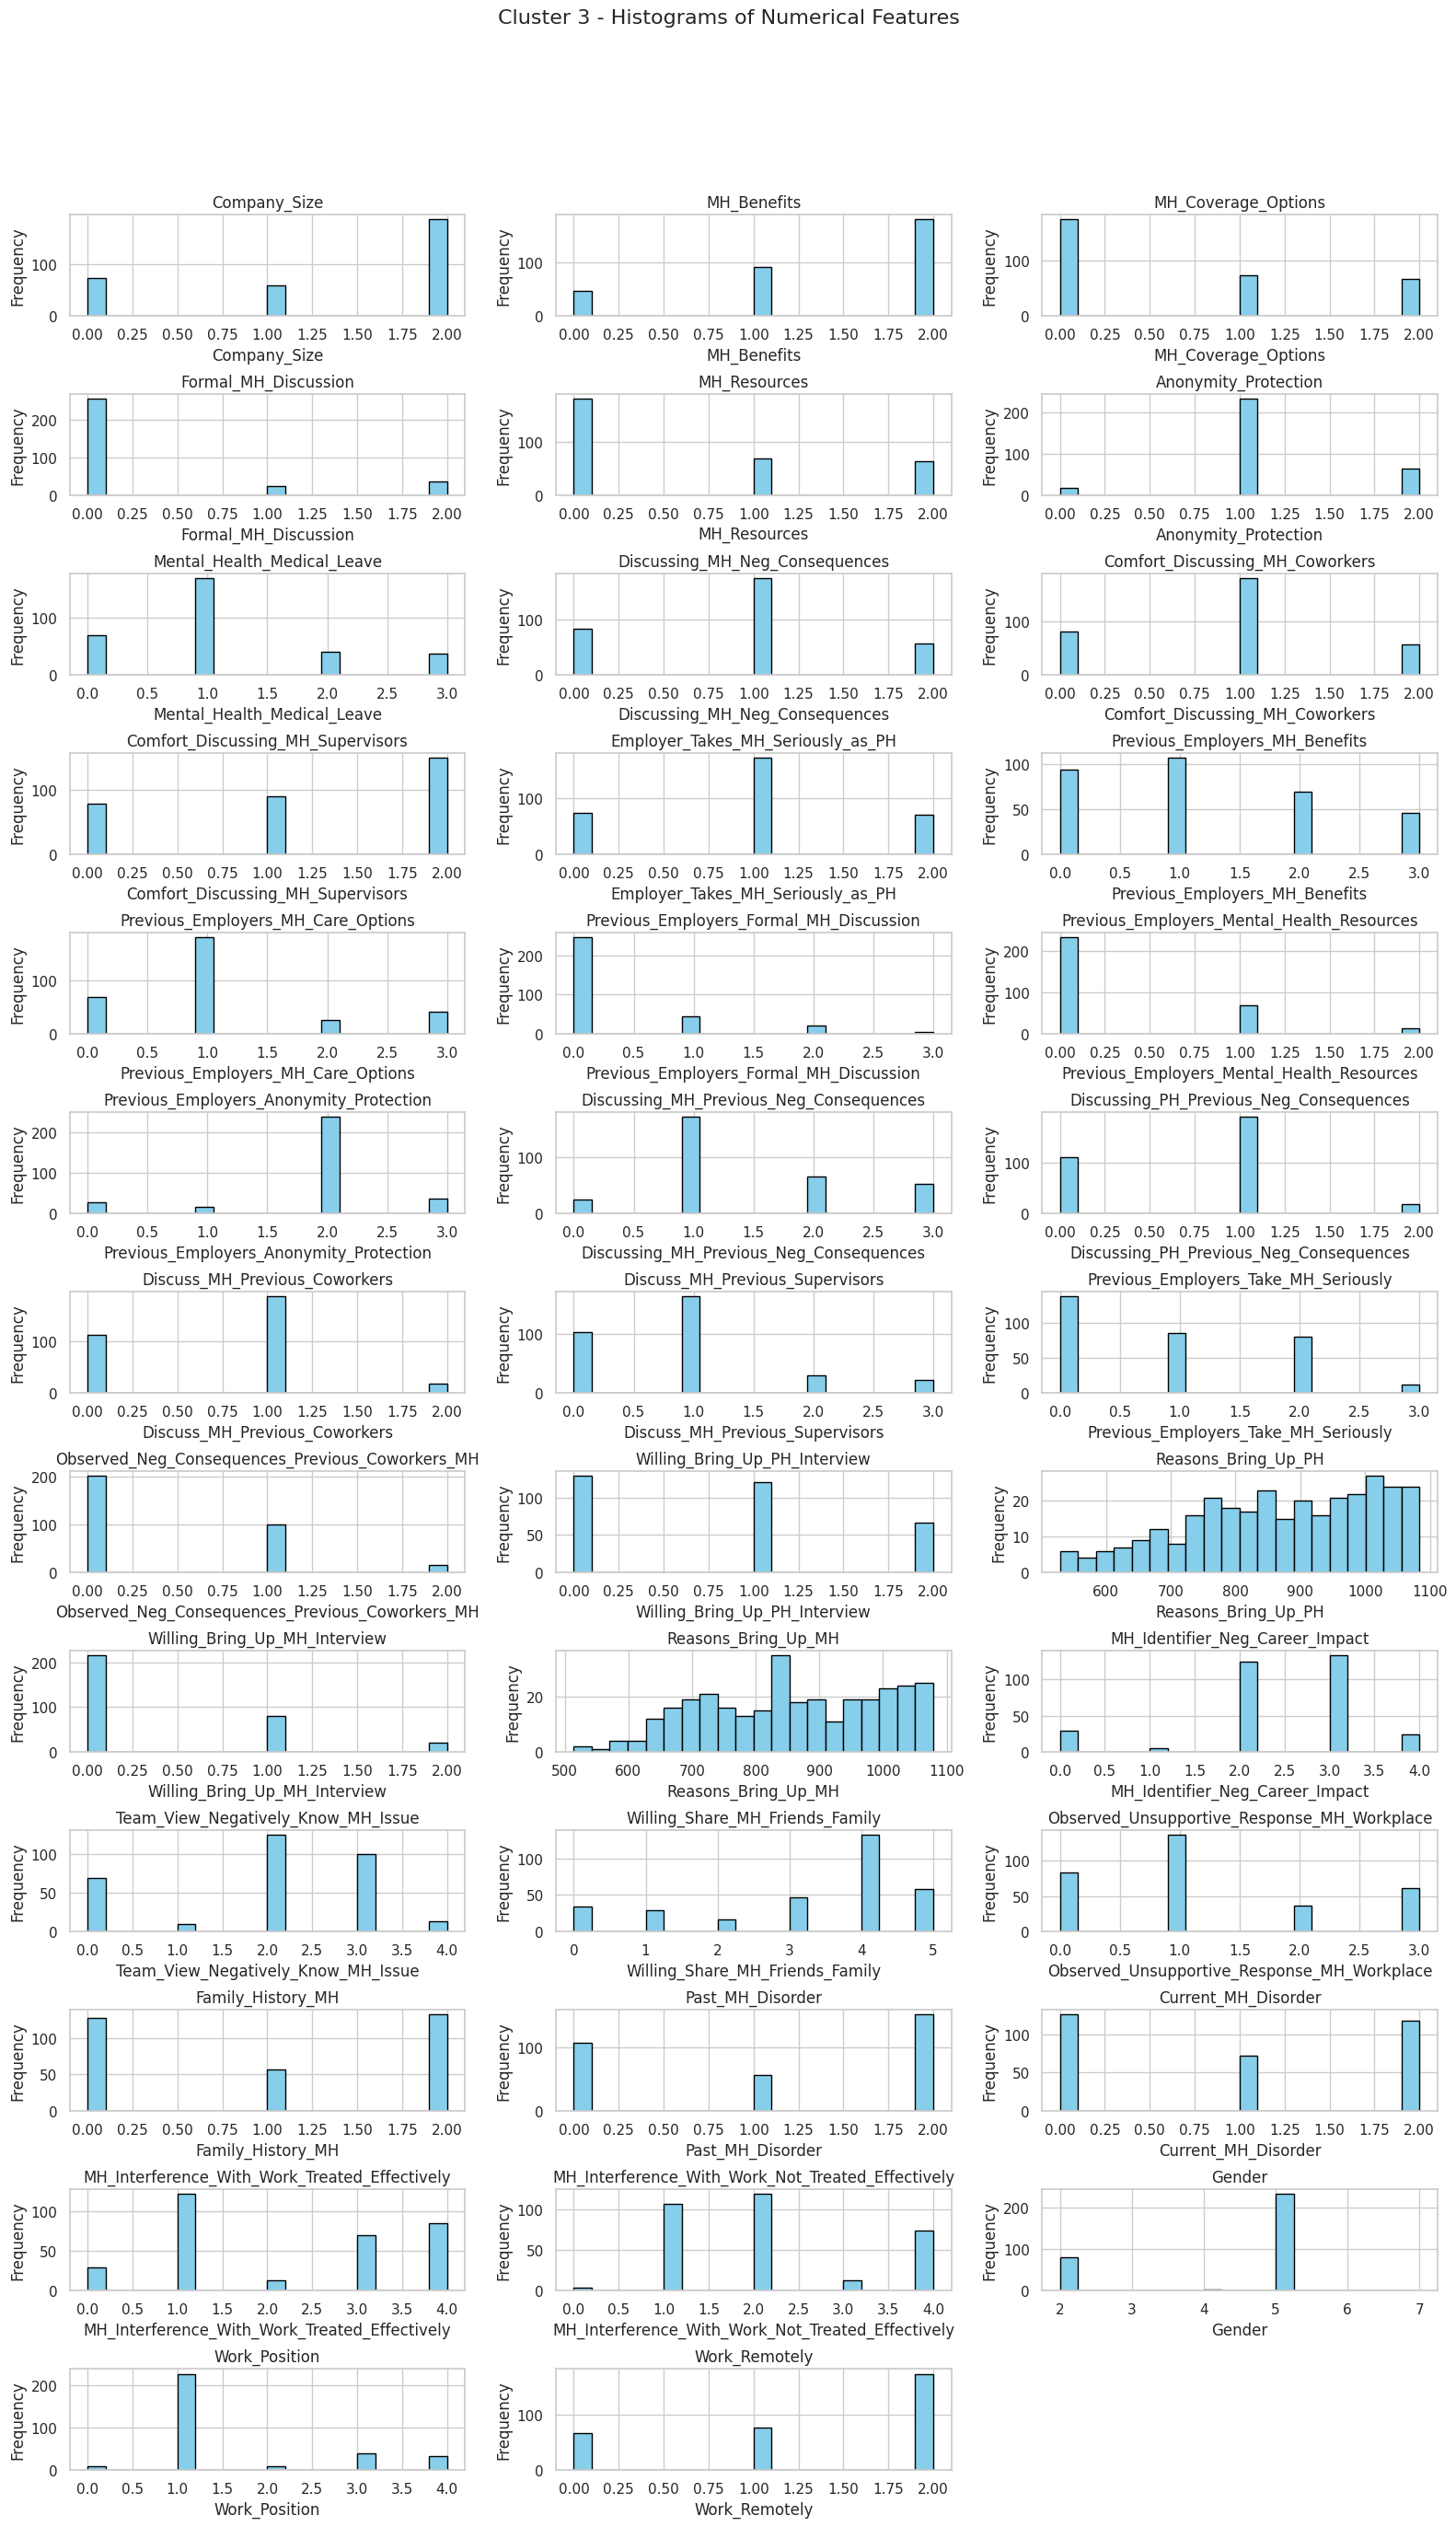

In [46]:

# Group the data by clusters
cluster_groups = df.groupby('Cluster')

# Create a new directory to save cluster-specific visualizations
import os
if not os.path.exists('cluster_visualizations'):
    os.makedirs('cluster_visualizations')

# Iterate through clusters and create histograms for numerical features
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")

    # Select numerical columns to visualize
    numeric_features = group.select_dtypes(include=['int64', 'float64'])

    # Determine the number of rows and columns for subplots
    n_rows = (len(numeric_features.columns) + 2) // 3  # 3 subplots per row
    n_cols = min(len(numeric_features.columns), 3)  # Up to 3 subplots in a row

    # Set up subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 28))
    fig.suptitle(f"Cluster {cluster} - Histograms of Numerical Features", fontsize=16)
    axes = axes.ravel()

    for i, col in enumerate(numeric_features.columns):
        axes[i].hist(group[col], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Remove any empty subplots
    for i in range(len(numeric_features.columns), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Save the visualization to a file
    plt.savefig(f'cluster_visualizations/cluster_{cluster}_histograms.png')
    plt.show()

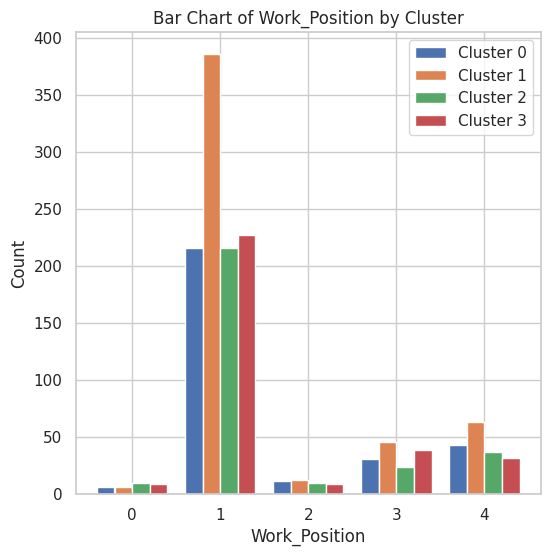

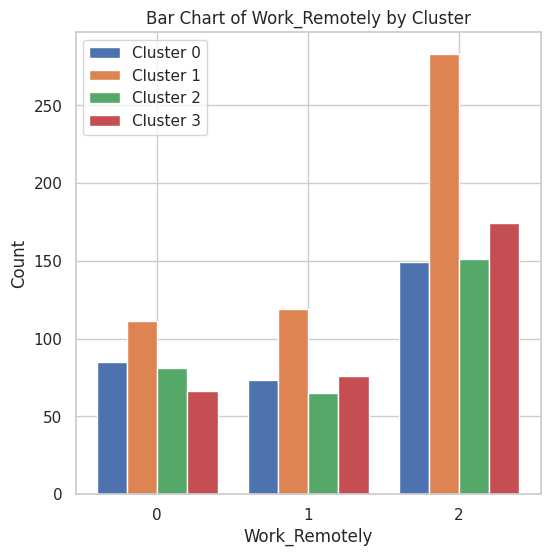

In [47]:
variables_of_interest = ['Work_Position', 'Work_Remotely']


cluster_width = 0.2 

for variable in variables_of_interest:
    plt.figure(figsize=(6, 6))
    x_positions = None 
    
    for cluster in range(k): 
        cluster_data = df[df['Cluster'] == cluster]
        variable_counts = cluster_data[variable].value_counts().sort_index()
        
        if x_positions is None:
            x_positions = range(len(variable_counts))
        

        plt.bar([x + cluster * cluster_width for x in x_positions], variable_counts.values, width=cluster_width, label=f'Cluster {cluster}')
        
    plt.title(f'Bar Chart of {variable} by Cluster')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend()
    plt.xticks([x + ((k - 1) * cluster_width) / 2 for x in x_positions], variable_counts.index)
    plt.grid(True)
    plt.show()